# Telecom Churn Case Study

# Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 ## Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn. 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Steps:-
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [86]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [87]:
df=pd.read_csv("Downloads/telecom_churn_data.csv")

In [88]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [89]:
df.shape

(99999, 226)

In [90]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# Handling Missing Values

In [91]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [92]:
# List the columns having more than 40% missing values
col_list_missing_40 = list(df_missing_columns.index[df_missing_columns['null'] > 40])

In [93]:
# Delete the columns having more than 40% missing values
df = df.drop(col_list_missing_40, axis=1)

In [94]:
df.shape

(99999, 186)

In [95]:
# removing the columns with datetype as they will not be used in any analysis
columns=df.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
df[col_with_date].dtypes

date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
date_of_last_rech_9    object
dtype: object

In [96]:
# Checking the date format
df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014


In [97]:
# Dropping date columns
df = df.drop(col_with_date, axis=1)

In [98]:
# Checking if there are any duplicate records.
df['mobile_number'].value_counts().sum()

99999

In [99]:
# Since number of rows is same as distinct mobile numbers, there is no duplicate data
# mobile_number is a unique identifier 
# Setting mobile_number as the index 
df = df.set_index('mobile_number')

In [100]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=df.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=df[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and df[column].dtype in ['int','float']:
        change_to_cat.append(column)

In [101]:
# Converting all the above columns having <=29 unique values into categorical data type.
df[change_to_cat]=df[change_to_cat].astype('category')

In [102]:
# Converting *sachet* variables to categorical data type 
sachet_columns = df.filter(regex='.*sachet.*', axis=1).columns.values
df[sachet_columns] = df[sachet_columns].astype('category')

# Filtering High Value Customers

Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [103]:
#Deriving Average recharge amount of June and July.
df['Average_rech_amt_6n7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [104]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
df_hv=df[(df['Average_rech_amt_6n7']>= df['Average_rech_amt_6n7'].quantile(0.7))]

In [105]:
df_hv.shape

(30011, 182)

We can see that we have around *~30K* rows after filtering

# Missing Values

In [106]:
# Cheking percent of missing values in columns
df_missing = (round(((df_hv.isnull().sum()/len(df_hv.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing

,null
loc_ic_t2m_mou_9,5.68
og_others_9,5.68
loc_og_t2m_mou_9,5.68
loc_og_t2f_mou_9,5.68
loc_og_t2c_mou_9,5.68
...,...
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [107]:
# Listing the columns of MOU Sep(9)
print(((df_missing[df_missing['null'] == 5.68]).index).to_list())

['loc_ic_t2m_mou_9', 'og_others_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'loc_ic_t2t_mou_9', 'roam_og_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'loc_og_t2t_mou_9', 'spl_og_mou_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9']


In [108]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df_hv[(df_hv['loc_ic_t2m_mou_9'].isnull()) & (df_hv['og_others_9'].isnull()) & (df_hv['loc_og_t2m_mou_9'].isnull()) & (df_hv['loc_og_t2f_mou_9'].isnull()) &
  (df_hv['loc_og_t2c_mou_9'].isnull()) & (df_hv['loc_og_mou_9'].isnull()) & (df_hv['std_og_t2t_mou_9'].isnull()) & (df_hv['std_og_t2m_mou_9'].isnull()) &
  (df_hv['std_og_t2f_mou_9'].isnull()) & (df_hv['std_og_t2c_mou_9'].isnull()) & (df_hv['std_og_mou_9'].isnull()) & (df_hv['isd_og_mou_9'].isnull()) &
  (df_hv['loc_ic_t2t_mou_9'].isnull()) & (df_hv['roam_og_mou_9'].isnull()) & (df_hv['loc_ic_t2f_mou_9'].isnull()) & (df_hv['loc_ic_mou_9'].isnull()) & 
  (df_hv['loc_ic_mou_9'].isnull()) & (df_hv['std_ic_t2t_mou_9'].isnull()) & (df_hv['std_ic_t2m_mou_9'].isnull()) & (df_hv['std_ic_t2f_mou_9'].isnull()) & 
  (df_hv['std_ic_t2o_mou_9'].isnull()) & (df_hv['std_ic_mou_9'].isnull()) & (df_hv['spl_ic_mou_9'].isnull()) & (df_hv['isd_ic_mou_9'].isnull()) & 
  (df_hv['ic_others_9'].isnull()) & (df_hv['loc_og_t2t_mou_9'].isnull()) & (df_hv['loc_og_t2t_mou_9'].isnull()) & (df_hv['onnet_mou_9'].isnull()) & 
  (df_hv['offnet_mou_9'].isnull())& (df_hv['roam_ic_mou_9'].isnull())]

df_null_mou_9.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
7000589828,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,374.863,294.023,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
7001300706,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,596.301,146.073,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
7000106299,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,695.609,39.981,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
7000340381,109,0.0,0.0,0.0,6/30/2014,7/31/2014,NaN,NaN,734.641,183.668,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [109]:
df_null_mou_9.shape

(1704, 182)

In [110]:
df_hv = df_hv.drop(df_null_mou_9.index)

In [111]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df_hv.isnull().sum()/len(df_hv.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_8,0.55
loc_og_mou_8,0.55
loc_ic_t2t_mou_8,0.55
roam_og_mou_8,0.55
loc_og_t2t_mou_8,0.55
...,...
total_og_mou_6,0.00
og_others_9,0.00
spl_og_mou_9,0.00
isd_og_mou_9,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [112]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['loc_ic_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'og_others_8', 'loc_og_t2c_mou_8', 'std_ic_t2o_mou_8', 'roam_ic_mou_8', 'std_og_t2t_mou_8', 'spl_og_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2m_mou_8', 'ic_others_8', 'offnet_mou_8', 'isd_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_8', 'onnet_mou_8', 'spl_ic_mou_8']


In [113]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df_hv[(df_hv['loc_og_t2m_mou_8'].isnull()) & (df_hv['loc_ic_t2f_mou_8'].isnull()) & (df_hv['roam_og_mou_8'].isnull()) & (df_hv['std_ic_t2m_mou_8'].isnull()) &
  (df_hv['loc_og_t2t_mou_8'].isnull()) & (df_hv['std_ic_t2t_mou_8'].isnull()) & (df_hv['loc_og_t2f_mou_8'].isnull()) & (df_hv['loc_ic_mou_8'].isnull()) &
  (df_hv['loc_og_t2c_mou_8'].isnull()) & (df_hv['loc_og_mou_8'].isnull()) & (df_hv['std_og_t2t_mou_8'].isnull()) & (df_hv['roam_ic_mou_8'].isnull()) &
  (df_hv['loc_ic_t2m_mou_8'].isnull()) & (df_hv['std_og_t2m_mou_8'].isnull()) & (df_hv['loc_ic_t2t_mou_8'].isnull()) & (df_hv['std_og_t2f_mou_8'].isnull()) & 
  (df_hv['std_og_t2c_mou_8'].isnull()) & (df_hv['og_others_8'].isnull()) & (df_hv['std_og_mou_8'].isnull()) & (df_hv['spl_og_mou_8'].isnull()) & 
  (df_hv['std_ic_t2f_mou_8'].isnull()) & (df_hv['isd_og_mou_8'].isnull()) & (df_hv['std_ic_mou_8'].isnull()) & (df_hv['offnet_mou_8'].isnull()) & 
  (df_hv['isd_ic_mou_8'].isnull()) & (df_hv['ic_others_8'].isnull()) & (df_hv['std_ic_t2o_mou_8'].isnull()) & (df_hv['onnet_mou_8'].isnull()) & 
  (df_hv['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7
mobile_number,,,,,,,,,,,,,,,,,,,,,
7002252754,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,580.477,111.878,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
7000248548,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,569.612,237.289,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
7000636808,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,532.742,546.756,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
7000516213,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,810.455,0.000,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
7002192662,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,649.150,149.572,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [114]:
df_null_mou_8.shape

(157, 182)

In [115]:
# Deleting the records for which MOU for Aug(8) are null
df_hv= df_hv.drop(df_null_mou_8.index)

In [116]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df_hv.isnull().sum()/len(df_hv.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
loc_ic_mou_6,0.44
std_ic_t2t_mou_6,0.44
loc_ic_t2t_mou_6,0.44
roam_og_mou_6,0.44
...,...
std_og_mou_8,0.00
std_og_t2c_mou_9,0.00
std_og_t2c_mou_8,0.00
std_og_t2f_mou_9,0.00


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [117]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_t2t_mou_6', 'roam_og_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2t_mou_6', 'ic_others_6', 'loc_og_t2m_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6', 'isd_ic_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_mou_6', 'std_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_mou_6', 'std_ic_t2f_mou_6', 'spl_og_mou_6', 'og_others_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'std_og_t2c_mou_6', 'onnet_mou_6', 'std_ic_t2o_mou_6', 'offnet_mou_6', 'isd_og_mou_6']


In [118]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df_hv[(df_hv['loc_og_t2m_mou_6'].isnull()) & (df_hv['loc_ic_t2f_mou_6'].isnull()) & (df_hv['roam_og_mou_6'].isnull()) & (df_hv['std_ic_t2m_mou_6'].isnull()) &
  (df_hv['loc_og_t2t_mou_6'].isnull()) & (df_hv['std_ic_t2t_mou_6'].isnull()) & (df_hv['loc_og_t2f_mou_6'].isnull()) & (df_hv['loc_ic_mou_6'].isnull()) &
  (df_hv['loc_og_t2c_mou_6'].isnull()) & (df_hv['loc_og_mou_6'].isnull()) & (df_hv['std_og_t2t_mou_6'].isnull()) & (df_hv['roam_ic_mou_6'].isnull()) &
  (df_hv['loc_ic_t2m_mou_6'].isnull()) & (df_hv['std_og_t2m_mou_6'].isnull()) & (df_hv['loc_ic_t2t_mou_6'].isnull()) & (df_hv['std_og_t2f_mou_6'].isnull()) & 
  (df_hv['std_og_t2c_mou_6'].isnull()) & (df_hv['og_others_6'].isnull()) & (df_hv['std_og_mou_6'].isnull()) & (df_hv['spl_og_mou_6'].isnull()) & 
  (df_hv['std_ic_t2f_mou_6'].isnull()) & (df_hv['isd_og_mou_6'].isnull()) & (df_hv['std_ic_mou_6'].isnull()) & (df_hv['offnet_mou_6'].isnull()) & 
  (df_hv['isd_ic_mou_6'].isnull()) & (df_hv['ic_others_6'].isnull()) & (df_hv['std_ic_t2o_mou_6'].isnull()) & (df_hv['onnet_mou_6'].isnull()) & 
  (df_hv['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001328263,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,30.000,82.378,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
7002168045,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.000,792.112,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
7000635248,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,213.802,304.194,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
7002152278,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,48.000,764.152,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
7000486275,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.000,757.170,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [119]:
df_null_mou_6.shape

(124, 182)

In [120]:
# Deleting the records for which MOU for Jun(6) are null
df_hv = df_hv.drop(df_null_mou_6.index)

In [121]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df_hv.isnull().sum()/len(df_hv.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_ic_t2t_mou_7,0.12
offnet_mou_7,0.12
spl_og_mou_7,0.12
loc_og_t2m_mou_7,0.12
isd_og_mou_7,0.12
...,...
isd_og_mou_6,0.00
isd_og_mou_8,0.00
isd_og_mou_9,0.00
spl_og_mou_6,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [122]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['std_ic_t2t_mou_7', 'offnet_mou_7', 'spl_og_mou_7', 'loc_og_t2m_mou_7', 'isd_og_mou_7', 'og_others_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'roam_og_mou_7', 'isd_ic_mou_7', 'std_ic_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_og_t2c_mou_7', 'loc_ic_t2f_mou_7', 'ic_others_7', 'std_og_t2t_mou_7', 'onnet_mou_7', 'loc_ic_t2m_mou_7', 'spl_ic_mou_7']


In [123]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df_hv[(df_hv['loc_og_t2m_mou_7'].isnull()) & (df_hv['loc_ic_t2f_mou_7'].isnull()) & (df_hv['roam_og_mou_7'].isnull()) & (df_hv['std_ic_t2m_mou_7'].isnull()) &
  (df_hv['loc_og_t2t_mou_7'].isnull()) & (df_hv['std_ic_t2t_mou_7'].isnull()) & (df_hv['loc_og_t2f_mou_7'].isnull()) & (df_hv['loc_ic_mou_7'].isnull()) &
  (df_hv['loc_og_t2c_mou_7'].isnull()) & (df_hv['loc_og_mou_7'].isnull()) & (df_hv['std_og_t2t_mou_7'].isnull()) & (df_hv['roam_ic_mou_7'].isnull()) &
  (df_hv['loc_ic_t2m_mou_7'].isnull()) & (df_hv['std_og_t2m_mou_7'].isnull()) & (df_hv['loc_ic_t2t_mou_7'].isnull()) & (df_hv['std_og_t2f_mou_7'].isnull()) & 
  (df_hv['std_og_t2c_mou_7'].isnull()) & (df_hv['og_others_7'].isnull()) & (df_hv['std_og_mou_7'].isnull()) & (df_hv['spl_og_mou_7'].isnull()) & 
  (df_hv['std_ic_t2f_mou_7'].isnull()) & (df_hv['isd_og_mou_7'].isnull()) & (df_hv['std_ic_mou_7'].isnull()) & (df_hv['offnet_mou_7'].isnull()) & 
  (df_hv['isd_ic_mou_7'].isnull()) & (df_hv['ic_others_7'].isnull()) & (df_hv['std_ic_t2o_mou_7'].isnull()) & (df_hv['onnet_mou_7'].isnull()) & 
  (df_hv['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001238202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,760.815,531.088,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
7001477649,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1129.566,0.000,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
7001658068,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,925.028,189.000,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
7001391499,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,894.818,85.000,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
7000131738,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1803.475,0.000,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [124]:
# Deleting the records for which MOU for Jul(7) are null
df_hv = df_hv.drop(df_null_mou_7.index)

In [125]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df_hv.isnull().sum()/len(df_hv.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
circle_id,0.0
std_ic_t2o_mou_8,0.0
std_ic_mou_6,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
...,...
std_og_t2c_mou_8,0.0
std_og_t2c_mou_9,0.0
std_og_mou_6,0.0
std_og_mou_7,0.0


In [126]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df_hv.index)/30011)),2)

0.07

In [127]:
df_hv.shape

(27991, 182)

We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

# Tag churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [128]:
df_hv['churn'] = np.where((df_hv['total_ic_mou_9']==0) & (df_hv['total_og_mou_9']==0) & (df_hv['vol_2g_mb_9']==0) & (df_hv['vol_3g_mb_9']==0), 1, 0)

Lets check for churn percentage now

In [129]:
round(100*(df_hv['churn'].mean()),2)

3.39

There is imbalance in the data . with only 3.32% churn customers , this will be dealt using one of class imbalance methods to offset this post we deal with outliers and feature selections

# Dropping Churn Month Features

In [130]:
churn_phase_columns = df_hv.filter(regex='9$').columns
df_hv.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
df_hv.columns.to_frame(index=False)

Retained Columns


,0
0,circle_id
1,loc_og_t2o_mou
2,std_og_t2o_mou
3,loc_ic_t2o_mou
4,last_date_of_month_6
...,...
135,jul_vbc_3g
136,jun_vbc_3g
137,sep_vbc_3g
138,Average_rech_amt_6n7


# Outliers Treatment

In [131]:
# Looking at quantiles from 0.90 to 1. 
df_hv.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,churn
0.900000,109.000000,979.363000,994.121000,995.474000,787.240000,830.540000,754.490000,901.730000,936.360000,873.880000,33.230000,18.590000,20.360000,64.840000,40.630000,39.540000,212.340000,214.080000,205.530000,440.130000,447.090000,429.830000,18.900000,19.360000,17.680000,4.100000,4.860000,4.660000,670.290000,672.330000,653.990000,620.130000,668.610000,590.410000,586.580000,644.090000,553.980000,2.360000,2.350000,1.960000,1111.730000,1171.640000,1082.940000,0.000000,0.000000,0.000000,15.850000,19.540000,18.640000,2.230000,0.000000,0.000000,1441.930000,1496.940000,1422.580000,156.690000,160.790000,154.290000,371.580000,371.580000,372.380000,40.730000,42.740000,39.430000,564.830000,569.930000,567.280000,34.590000,36.380000,33.480000,73.480000,76.330000,71.780000,4.530000,4.850000,4.330000,116.310000,120.330000,112.740000,688.430000,697.540000,685.930000,0.280000,0.000000,0.000000,14.430000,18.030000,16.440000,1.180000,1.660000,1.350000,23.000000,23.000000,22.000000,1165.000000,1191.000000,1171.000000,279.000000,279.000000,252.000000,229.000000,250.000000,229.000000,202.920000,201.380000,165.150000,856.540000,947.100000,929.620000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2875.000000,459.430000,458.330000,394.270000,0.000000,1116.000000,0.000000
0.910000,109.000000,1016.788600,1031.413700,1030.988600,835.143000,885.795000,808.450000,951.304000,984.100000,921.699000,40.480000,23.778000,25.378000,78.537000,49.305000,48.890000,230.750000,231.775000,222.790000,466.426000,469.519000,456.082000,20.880000,21.580000,19.590000,4.730000,5.549000,5.339000,710.885000,706.460000,690.360000,673.907000,727.742000,643.952000,640.758000,692.484000,600.803000,3.059000,3.028000,2.560000,1167.010000,1240.555000,1151.639000,0.000000,0.000000,0.000000,17.440000,21.260000,20.280000,2.510000,0.000000,0.000000,1509.496000,1560.428000,1498.346000,167.810000,172.440000,166.725000,394.155000,393.400000,394.389000,44.980000,46.987000,43.580000,600.273000,600.234000,596.930000,37.989000,40.307000,37.580000,80.557000,82.787000,78.680000,5.439000,5.760000,5.160000,126.053000,131.053000,122.976000,723.016000,732.193000,724.185000,0.300000,0.000000,0.000000,17.426000,21.707000,19.580000,1.460000,2.010000,1.660000,24.000000,24.

In [132]:
# Columns with outliers 
pct_change_99_1 = df_hv.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [133]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = df_hv[col].quantile(0.99)
    condition = df_hv[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : df_hv.loc[condition,col].shape[0] }, ignore_index=True)
    df_hv.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,arpu_6,1928.2303,280
1,arpu_7,1986.3081,280
2,arpu_8,1989.9498,280
3,onnet_mou_6,2131.56,280
4,onnet_mou_7,2222.498,280
...,...,...,...
112,aug_vbc_3g,1826.224,280
113,jul_vbc_3g,1944.829,280
114,jun_vbc_3g,1851.915,280
115,sep_vbc_3g,186.135,280


In [134]:
# Re-Looking at quantiles from 0.90 to 1. 
df_hv.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,churn
0.900000,109.000000,979.363000,994.121000,995.474000,787.240000,830.540000,754.490000,901.730000,936.360000,873.880000,33.230000,18.590000,20.360000,64.840000,40.630000,39.540000,212.340000,214.080000,205.530000,440.130000,447.090000,429.830000,18.900000,19.360000,17.680000,4.100000,4.860000,4.660000,670.290000,672.330000,653.990000,620.130000,668.610000,590.410000,586.580000,644.090000,553.980000,2.360000,2.350000,1.960000,1111.730000,1171.640000,1082.940000,0.000000,0.000000,0.000000,15.850000,19.540000,18.640000,2.230000,0.000000,0.000000,1441.930000,1496.940000,1422.580000,156.690000,160.790000,154.290000,371.580000,371.580000,372.380000,40.730000,42.740000,39.430000,564.830000,569.930000,567.280000,34.590000,36.380000,33.480000,73.480000,76.330000,71.780000,4.530000,4.850000,4.330000,116.310000,120.330000,112.740000,688.430000,697.540000,685.930000,0.280000,0.000000,0.000000,14.430000,18.030000,16.440000,1.180000,1.660000,1.350000,23.000000,23.000000,22.000000,1165.000000,1191.000000,1171.000000,279.000000,279.000000,252.000000,229.000000,250.000000,229.000000,202.920000,201.380000,165.150000,856.540000,947.100000,929.620000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2875.000000,459.430000,458.330000,394.270000,0.000000,1116.000000,0.000000
0.910000,109.000000,1016.788600,1031.413700,1030.988600,835.143000,885.795000,808.450000,951.304000,984.100000,921.699000,40.480000,23.778000,25.378000,78.537000,49.305000,48.890000,230.750000,231.775000,222.790000,466.426000,469.519000,456.082000,20.880000,21.580000,19.590000,4.730000,5.549000,5.339000,710.885000,706.460000,690.360000,673.907000,727.742000,643.952000,640.758000,692.484000,600.803000,3.059000,3.028000,2.560000,1167.010000,1240.555000,1151.639000,0.000000,0.000000,0.000000,17.440000,21.260000,20.280000,2.510000,0.000000,0.000000,1509.496000,1560.428000,1498.346000,167.810000,172.440000,166.725000,394.155000,393.400000,394.389000,44.980000,46.987000,43.580000,600.273000,600.234000,596.930000,37.989000,40.307000,37.580000,80.557000,82.787000,78.680000,5.439000,5.760000,5.160000,126.053000,131.053000,122.976000,723.016000,732.193000,724.185000,0.300000,0.000000,0.000000,17.426000,21.707000,19.580000,1.460000,2.010000,1.660000,24.000000,24.

# Univariate Analysis

In [135]:
churned_customers = df_hv[df_hv['churn'] == 1]
non_churned_customers = df_hv[df_hv['churn'] == 0]

In [136]:
df_hv['churn'].describe()

count    27991.000000
mean         0.033904
std          0.180985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [137]:
df_hv.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


### Age on Network

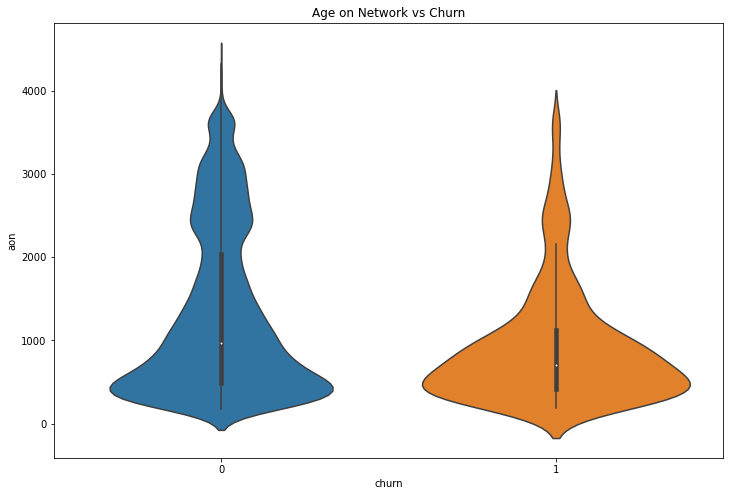

In [138]:
plt.figure(figsize=(12,8))
sns.violinplot(x='churn', y='aon', data=df_hv)
plt.title('Age on Network vs Churn')
plt.show()


It is clear to deduce that the clients with lesser AON(Age on Network) are more likely to churn

In [139]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='churn', y = column_names[0], data = df_hv, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='churn', y = column_names[1], data = df_hv, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='churn', y = column_names[2], data = df_hv, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [140]:
# function for categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='churn',data=df_hv, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='churn',data=df_hv, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='churn',data=df_hv, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

#### Checking for the effect of Average Revenue per User on the chrn numbers

Customers who churned (Churn : 1)
            arpu_6       arpu_7       arpu_8
count   949.000000   949.000000   949.000000
mean    633.421154   577.520350   321.337481
std     375.675326   364.497298   356.024230
min    -124.766000   -28.543000   -19.166000
25%     387.162000   347.206000    55.444000
50%     539.914000   495.017000   225.446000
75%     793.756000   724.277000   460.871000
max    1928.230300  1986.308100  1989.949800

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27042.000000  27042.000000  27042.000000
mean     571.090630    583.627647    552.639557
std      325.176775    332.015940    359.605758
min    -2258.709000  -2014.045000   -945.808000
25%      363.314750    370.185000    321.576500
50%      490.076500    496.349000    471.987500
75%      691.220500    700.865500    690.623750
max     1928.230300   1986.308100   1989.949800 



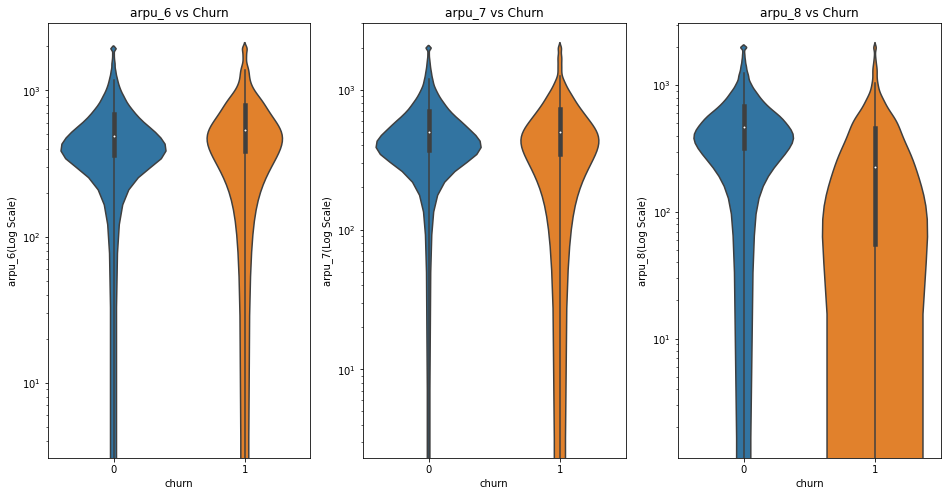

In [141]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

- ARPU for churn customers start reducing from 8th month - the action phase. This is the phase where they start getting upset with the services available
- The customers more likely to churn have a decresing trend in ARPU right from good phase , initially very low increase and then a drastic decrease

In [142]:
### Effect of outgoing calls on Churn

Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count      949.000000      949.000000      949.000000
mean       935.344573      785.661594      301.160040
std        759.600695      752.390781      542.399479
min          0.000000        0.000000        0.000000
25%        386.110000      227.890000        0.000000
50%        764.310000      616.930000        5.400000
75%       1322.110000     1060.430000      386.330000
max       3147.260000     3287.641000     3277.163000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27042.000000    27042.000000    27042.000000
mean       665.850321      705.962497      654.444010
std        584.727316      613.329734      616.913274
min          0.000000        0.000000        0.000000
25%        271.877500      289.880000      234.602500
50%        505.020000      534.195000      475.410000
75%        874.537500      934.347500      869.510000
max    

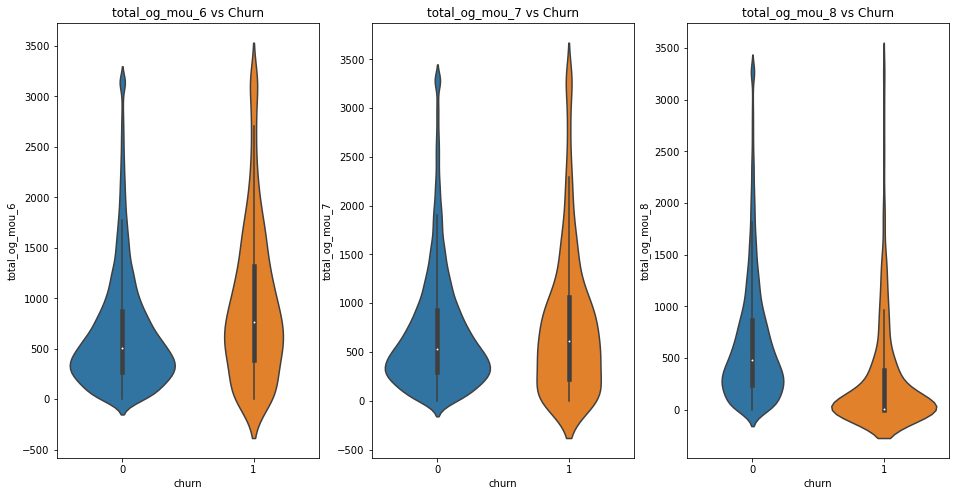

In [143]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

- For customers likely to churn , it is very clear that the outgoing calls have reduced to almost 1/3rd over 3 months. This is a very clear indication of churning
- Hence customers with decrease in mou from 6th to 7th month is more likely to churn

### Effect of Incoming calls on Churn

Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count      949.000000      949.000000      949.000000
mean       176.335374      144.387283       58.338177
std        210.000287      191.484213      126.898615
min          0.000000        0.000000        0.000000
25%         50.790000       33.790000        0.000000
50%        118.760000       92.190000        3.460000
75%        228.710000      183.930000       67.160000
max       1733.230000     1820.524000     1750.360000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27042.000000    27042.000000    27042.000000
mean       310.098601      322.401069      312.990924
std        317.386811      324.645984      321.945268
min          0.000000        0.000000        0.000000
25%         97.682500      110.380000      100.900000
50%        215.460000      225.085000      215.350000
75%        404.917500      413.410000      404.912500
max    

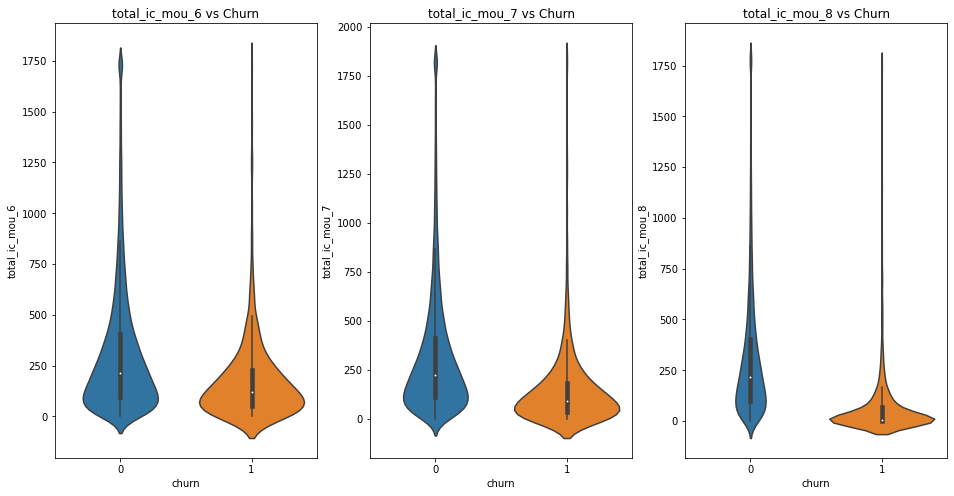

In [144]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

- For customers likely to churn , it is very clear that the incoming calls have reduced to almost 1/3rd over 3 months. This is a very clear indication of churning. It has same pattern as outgoing calls 
- Hence customers with decrease in incoming from 6th to 7th month is more likely to churn

### Effect of 2g usage

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count   949.000000   949.000000   949.000000
mean     38.580293    34.512671    15.155463
std     167.985917   154.887872   106.449042
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    1325.263000  1354.307000  1284.376000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27042.000000  27042.000000  27042.000000
mean      73.633407     73.326639     66.594262
std      214.220584    215.453037    201.270804
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       17.115000     18.345000     14.347500
max     1325.263000   1354.307000   1284.376000 



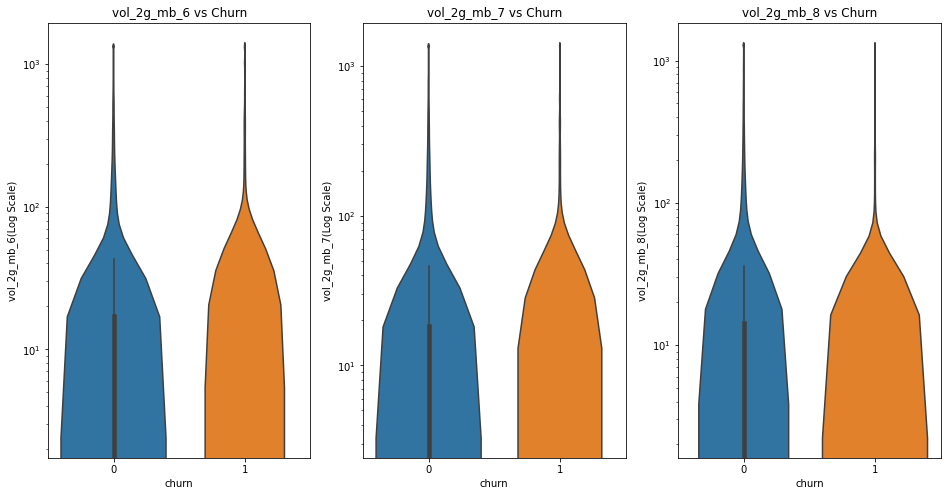

In [145]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

- No major changes detected . There is no clear pattern emerging from 2g usage

### Effect of 3G usage 

Customers who churned (Churn : 1)
       vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8
count   949.000000   949.000000   949.000000
mean     86.696133    78.099631    37.494428
std     406.007619   404.901195   282.800128
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    3385.170000  3603.715000  3644.461000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count  27042.000000  27042.000000  27042.000000
mean     230.429698    254.734979    256.697194
std      589.974726    628.762658    638.349349
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000     22.737500     17.177500
max     3385.170000   3603.715000   3644.461000 



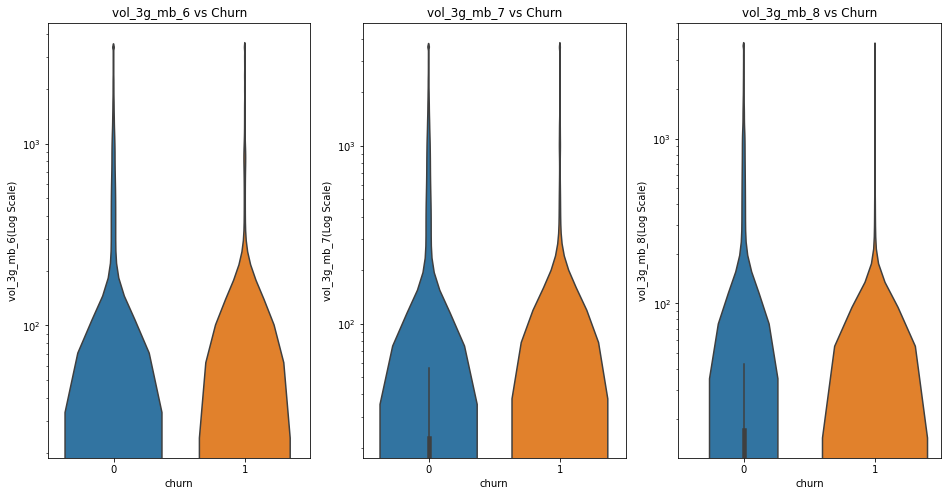

In [146]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
num_univariate_analysis(columns, 'log')

- For customers likely to churn , it is very clear that the 3g usage have reduced to almost 1/3rd over 3 months. This is a very clear indication of churning. It has same pattern as outgoing  and incoming calls
- Hence customers with decrease in 3g usage from 6th to 7th month is more likely to churn

### Effect of monthly 2G usage

Customers who churned (Churn : 1)
+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+--------------------+----------------------|
|  0 |              0 |     914 | 96.3119   |                914 |              96.3119 |
|  1 |              1 |      32 |  3.37197  |                946 |              99.6839 |
|  2 |              2 |       3 |  0.316122 |                949 |             100      |
+----+----------------+---------+-----------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+--------------------+----------------------|
|  0 |              0 |     916 | 96.5227   |                916

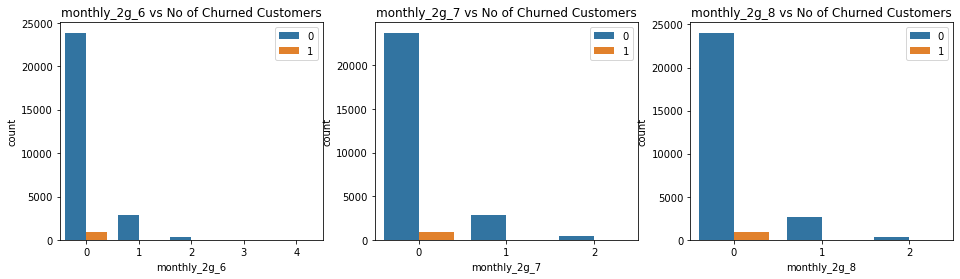

In [147]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+--------------------+----------------------|
|  0 |              0 |     912 | 96.1012   |                912 |              96.1012 |
|  1 |              1 |      27 |  2.8451   |                939 |              98.9463 |
|  2 |              2 |       6 |  0.632244 |                945 |              99.5785 |
|  3 |              3 |       4 |  0.421496 |                949 |             100      |
+----+----------------+---------+-----------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_3g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-------------------

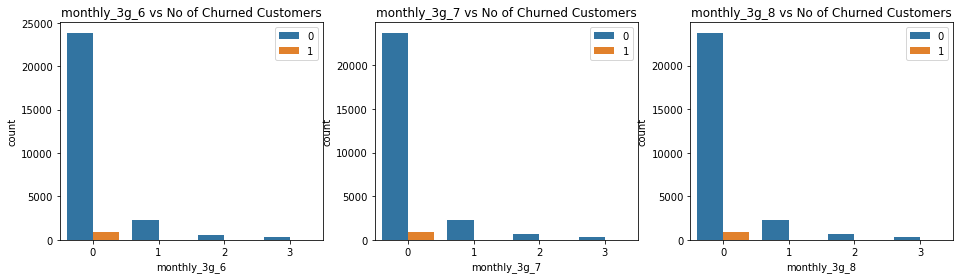

In [148]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+---------------+---------+-----------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+-----------+--------------------+----------------------|
|  0 |             0 |     919 | 96.8388   |                919 |              96.8388 |
|  1 |             1 |      16 |  1.68599  |                935 |              98.5248 |
|  2 |             4 |       5 |  0.52687  |                940 |              99.0516 |
|  3 |             9 |       2 |  0.210748 |                942 |              99.2624 |
|  4 |             7 |       2 |  0.210748 |                944 |              99.4731 |
|  5 |             2 |       2 |  0.210748 |                946 |              99.6839 |
|  6 |            10 |       1 |  0.105374 |                947 |              99.7893 |
|  7 |             6 |       1 |  0.105374 |                948 |           

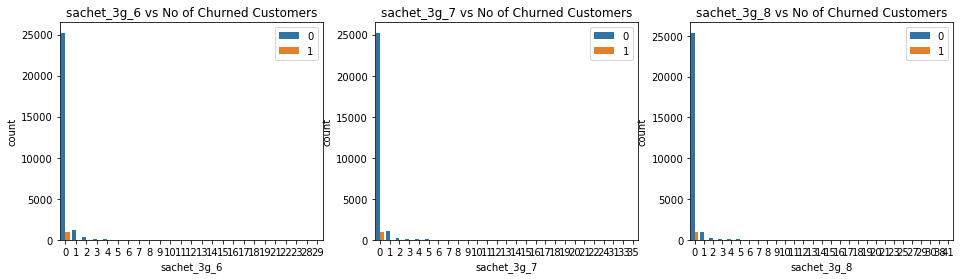

In [149]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
        aug_vbc_3g   jul_vbc_3g   jun_vbc_3g
count   949.000000   949.000000   949.000000
mean     18.796006    31.461009    34.136396
std     111.990500   164.713479   162.914857
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    1733.920000  1944.829000  1811.490000

Customers who did not churn (Churn : 0)
         aug_vbc_3g    jul_vbc_3g    jun_vbc_3g
count  27042.000000  27042.000000  27042.000000
mean     128.259050    130.265159    114.438637
std      327.276952    341.708192    314.473698
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.007500      8.942500      0.000000
max     1826.224000   1944.829000   1851.915000 



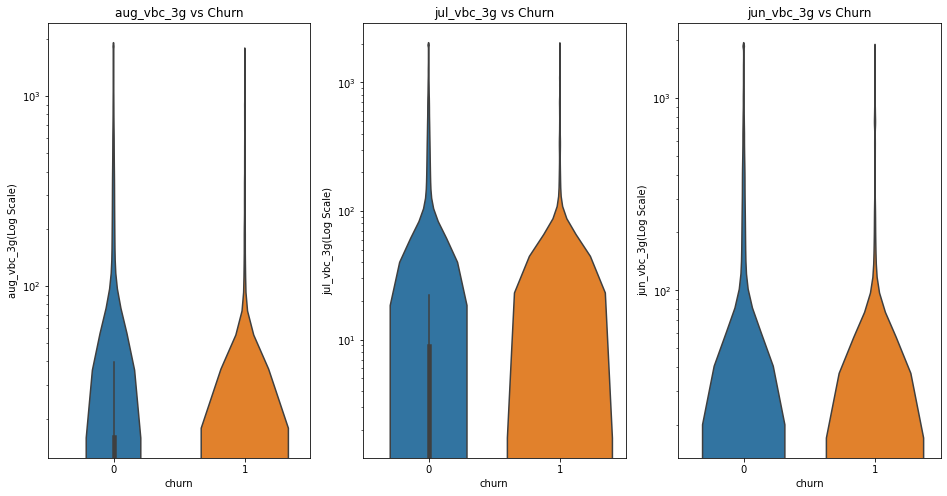

In [150]:
columns = [ 'aug_vbc_3g', 'jul_vbc_3g','jun_vbc_3g']
num_univariate_analysis(columns, 'log')

- As per univariate analysis , we can conclude incoming, outgoing and 3g usage decreasing trend contributes to more chances of churn
- We have also checked the monthly sachet usage , 3g usage , monthly rcharges and we can see similar trends on the same

# Bivariate Analysis

### Checking for the outgoing calls impact on Churn tag for 6th and 8th month( good phase to action phase)

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

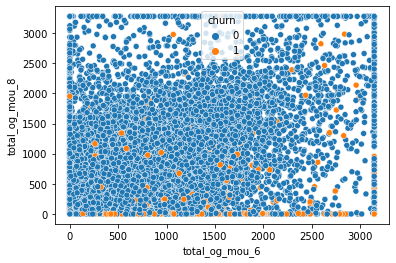

In [151]:
sns.scatterplot(x=df_hv['total_og_mou_6'],y=df_hv['total_og_mou_8'],hue=df_hv['churn'])

- Clear indication that sharp reduction in outgoing calls from 6th to 8th month are more likely to churn

### Checking for the outgoing calls impact on Churn tag for 6th and 7th month( good phase to action phase)

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

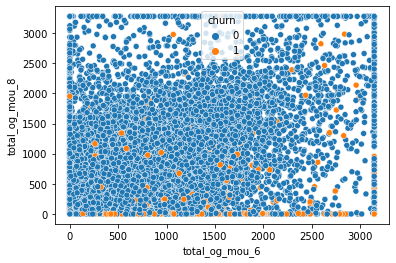

In [152]:
sns.scatterplot(x=df_hv['total_og_mou_6'],y=df_hv['total_og_mou_8'],hue=df_hv['churn'])

- Clear indication that there is slight reduction in outgoing calls from 6th to 7th month are more likely to churn

### Impact of AON on incoming and outgoing calls in 8th month

<AxesSubplot:xlabel='aon', ylabel='total_og_mou_8'>

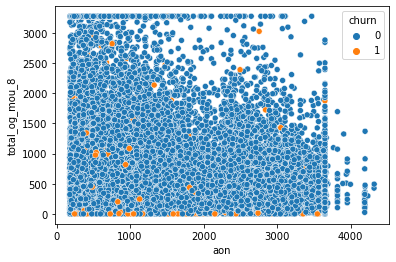

In [153]:
sns.scatterplot(x=df_hv['aon'],y=df_hv['total_og_mou_8'],hue=df_hv['churn'])

<AxesSubplot:xlabel='aon', ylabel='total_ic_mou_8'>

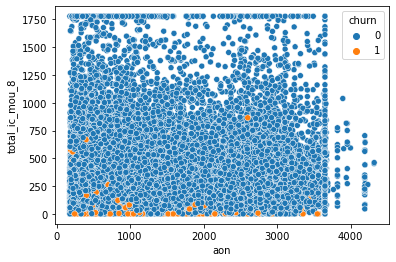

In [154]:
sns.scatterplot(x=df_hv['aon'],y=df_hv['total_ic_mou_8'],hue=df_hv['churn'])

- The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
- The customers with total_ic_mou_8 > 2000 are very less likely to churn.

<AxesSubplot:xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

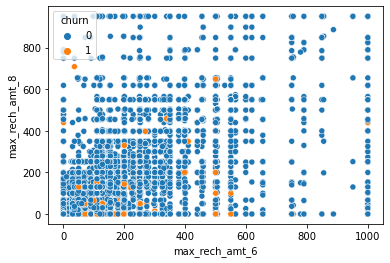

In [155]:
sns.scatterplot(x=df_hv['max_rech_amt_6'],y=df_hv['max_rech_amt_8'],hue=df_hv['churn'])

## Correlation Analysis

In [156]:
# function to correlate variables
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [157]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 

cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
arpu_8,total_rech_amt_8,0.930000
arpu_6,total_rech_amt_6,0.920000
total_ic_mou_6,loc_ic_mou_6,0.910000
arpu_7,total_rech_amt_7,0.910000
total_ic_mou_8,loc_ic_mou_8,0.900000
loc_ic_mou_7,total_ic_mou_7,0.890000
loc_ic_t2m_mou_6,loc_ic_mou_6,0.880000
loc_ic_t2m_mou_8,loc_ic_mou_8,0.880000
onnet_mou_8,std_og_t2t_mou_8,0.870000
loc_ic_mou_7,loc_ic_mou_8,0.870000


In [158]:
# Correlations for Churn : 1  - Churn customers
# Absolute values are reported 

cor_0 = correlation(churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
std_og_mou_8,total_og_mou_8,0.990000
total_og_mou_7,std_og_mou_7,0.980000
arpu_8,total_rech_amt_8,0.960000
total_og_mou_6,std_og_mou_6,0.960000
std_og_t2t_mou_7,onnet_mou_7,0.950000
loc_ic_t2m_mou_8,loc_ic_mou_8,0.950000
onnet_mou_6,std_og_t2t_mou_6,0.950000
arpu_7,total_rech_amt_7,0.950000
arpu_6,total_rech_amt_6,0.950000
onnet_mou_8,std_og_t2t_mou_8,0.940000


## Grouping Categories with less Contribution

In [159]:
categorical = df_hv.dtypes == 'category'
categorical_vars = df_hv.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'churn'} #independent categorical variables
ind_categorical_vars

{'loc_ic_t2o_mou',
 'loc_og_t2o_mou',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2o_mou'}

In [160]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100*df_hv[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    df_hv[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_3g_6 |
|----+---------------|
|  0 |   93.3872     |
|  1 |    4.38355    |
|  2 |    1.05391    |
|  3 |    0.400129   |
|  4 |    0.210782   |
|  5 |    0.128613   |
|  6 |    0.0821693  |
|  7 |    0.0821693  |
|  9 |    0.0535887  |
|  8 |    0.0500161  |
| 10 |    0.0285806  |
| 11 |    0.0285806  |
| 15 |    0.0142903  |
| 12 |    0.0142903  |
| 14 |    0.0107177  |
| 13 |    0.0107177  |
| 18 |    0.0107177  |
| 19 |    0.0107177  |
| 16 |    0.00714515 |
| 22 |    0.00714515 |
| 23 |    0.00714515 |
| 29 |    0.00714515 |
| 17 |    0.00357258 |
| 21 |    0.00357258 |
| 28 |    0.00357258 |
+----+---------------+ 

Replaced [3, 4, 5, 6, 7, 9, 8, 10, 11, 15, 12, 14, 13, 18, 19, 16, 22, 23, 29, 17, 21, 28] in sachet_3g_6 with category : Others

 +----+--------------------+
|    |   std_og_t2c_mou_8 |
|----+--------------------|
|  0 |                100 |
+----+--------------------+ 

Replaced [] in std_og_t2c_mou_8 with category : Others



## Creating Dummy Variables

In [161]:
dummy_vars = pd.get_dummies(df_hv[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,std_og_t2c_mou_8_0.0,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,...,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,std_ic_t2o_mou_7_0.0,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001524846,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7002191713,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7000875565,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7000187447,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7002124215,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [162]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_3g_6_Others',
 'sachet_2g_7_Others',
 'sachet_2g_8_Others',
 'sachet_3g_8_Others',
 'sachet_2g_6_Others',
 'sachet_3g_7_Others']

In [163]:
# concatenating dummy variables with original 'data'
df_hv.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
df_hv = pd.concat([df_hv, dummy_vars], axis=1)
df_hv.head()

,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,std_ic_t2o_mou_7_0.0,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,0,1,0,0,0,0,1,1,0,0
7002191713,109,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,...,0,1,0,0,0,0,1,1,0,0
7000875565,109,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,...,0,1,0,0,0,0,1,1,0,0
7000187447,109,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,7.79,...,0,1,0,0,0,0,1,1,0,0
7002124215,109,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,85.14,...,0,1,0,0,0,0,1,1,0,0


In [164]:
dummy_cols = dummy_vars.columns.to_list()
df_hv[dummy_cols] = df_hv[dummy_cols].astype('category')

In [165]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
#df_hv_columns = df_hv.filter(regex='^date.*').columns
df_hv.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], inplace=True)

In [166]:
df_hv.shape

(27991, 156)

- With this we are completing the data understanding, cleaning and analysis of the data. We have created the dummy variables , removed outliers and removed missing values
- Also , we have identified that reduction in incoming , outgoing and 3g usage from 6th to 8th month indicates higher chances of churn
- Similarly , looking at bivariate analysis , we can conclude that sharp reduction in outgoing calls from 6th to 8th month are more likely to churn and only less reduction is observed from 7th to 8th month
- Also ,The customers with less total_ic_mou_8 are more likely to churn irrespective of aon and the customers with total_ic_mou_8 > 2000 are very less likely to churn.
- We will now move onto the model development and training and testing the data

# Model Building and Testing

This  section contains

- Test Train Split
- Class Imbalance
- Standardization
- Modelling
          Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
          Model 2 : PCA + Logistic Regression
          Model 3 : PCA + Random Forest Classifier
          Model 4 : PCA + XGBoost

## Train- Test Split

In [167]:
y = df_hv.pop('churn') # Predicted / Target Variable
X = df_hv # Predictor variables

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [169]:
X_train.info

<bound method DataFrame.info of                circle_id     arpu_6     arpu_7    arpu_8  onnet_mou_6  \
mobile_number                                                           
7001278716           109   324.2140   315.8130   406.483        47.24   
7001368471           109  1928.2303  1986.3081  1809.271         0.95   
7000727220           109   397.0550   458.1270   387.333        22.28   
7000967652           109   857.8400   767.1680   606.214         8.98   
7002032943           109   473.6130   572.0860   280.860        31.26   
...                  ...        ...        ...       ...          ...   
7000705587           109   315.7180   405.2910   368.876        12.96   
7001606100           109   772.3420   900.2340   931.763       878.74   
7001519854           109   477.7650   509.2380   624.083        98.26   
7001608162           109   311.8300   634.6210   661.065        44.68   
7000355047           109   391.2260   716.2770   898.941        18.64   

               onn

From earlier checks , we have identified that class imbalance is 3.32 %. Lets perform SMOTE method to reduce calss imbalance

In [170]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)
X_train=X_train.astype(np.float64)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,std_ic_t2o_mou_7_0.0,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
0,109.0,324.2140,315.8130,406.483,47.24,60.43,80.83,426.08,505.99,640.09,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,109.0,1928.2303,1986.3081,1809.271,0.95,79.11,103.19,307.99,636.13,589.86,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,109.0,397.0550,458.1270,387.333,22.28,17.99,4.64,947.09,969.59,707.28,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,109.0,857.8400,767.1680,606.214,8.98,4.56,160.96,980.84,1201.86,926.19,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,109.0,473.6130,572.0860,280.860,31.26,39.88,25.16,283.39,362.51,419.56,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Standardizing Columns

In [171]:
# columns with numerical data
condition1 = df_hv.dtypes == 'int'
condition2 = df_hv.dtypes == 'float'
numerical_vars = df_hv.columns[condition1 | condition2].to_list()

In [172]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [173]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,std_ic_t2o_mou_7_0.0,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
count,37864.0,37864.00,37864.00,37864.00,37864.00,37864.00,37864.00,37864.00,37864.00,37864.00,...,37864.00,37864.00,37864.00,37864.00,37864.00,37864.00,37864.0,37864.00,37864.00,37864.00
mean,109.0,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.02,0.86,0.07,0.03,0.01,0.01,1.0,0.95,0.03,0.01
std,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.14,0.33,0.23,0.15,0.11,0.09,0.0,0.21,0.17,0.08
min,109.0,-8.51,-5.02,-3.76,-0.81,-0.78,-0.59,-0.98,-0.94,-0.77,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00
25%,109.0,-0.65,-0.64,-0.74,-0.68,-0.64,-0.54,-0.67,-0.67,-0.65,...,0.00,1.00,0.00,0.00,0.00,0.00,1.0,1.00,0.00,0.00
50%,109.0,-0.24,-0.24,-0.19,-0.42,-0.40,-0.40,-0.34,-0.35,-0.36,...,0.00,1.00,0.00,0.00,0.00,0.00,1.0,1.00,0.00,0.00
75%,109.0,0.40,0.38,0.43,0.32,0.25,0.06,0.27,0.29,0.24,...,0.00,1.00,0.00,0.00,0.00,0.00,1.0,1.00,0.00,0.00
max,109.0,3.99,4.28,4.32,3.75,4.18,5.40,3.88,4.18,5.17,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


## Model 1 : Interpretable Model : Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [175]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [176]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [177]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [178]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15518  3414]
 [   83   578]]

Confusion Matrix for test: 
 [[3151 4959]
 [  43  245]]


In [179]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.822
Sensitivity / True Positive Rate / Recall : 0.874
Specificity / True Negative Rate :  0.82
Precision / Positive Predictive Value : 0.145
F1-score : 0.249


Test Performance : 

Accuracy : 0.404
Sensitivity / True Positive Rate / Recall : 0.851
Specificity / True Negative Rate :  0.389
Precision / Positive Predictive Value : 0.047
F1-score : 0.089


In [180]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7001278716,1,0,0,0,0,0,0,0,0,0
7001368471,1,0,0,0,0,0,0,0,0,0
7000727220,1,1,1,1,1,1,1,0,0,0
7000967652,1,1,1,0,0,0,0,0,0,0
7002032943,1,0,0,0,0,0,0,0,0,0


In [181]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.0,0.0,0.034
0.1,0.985,0.481,0.498
0.2,0.97,0.603,0.615
0.3,0.938,0.688,0.696
0.4,0.905,0.759,0.764
0.5,0.874,0.82,0.822
0.6,0.809,0.875,0.873
0.7,0.74,0.918,0.912
0.8,0.634,0.95,0.94
0.9,0.348,0.976,0.954


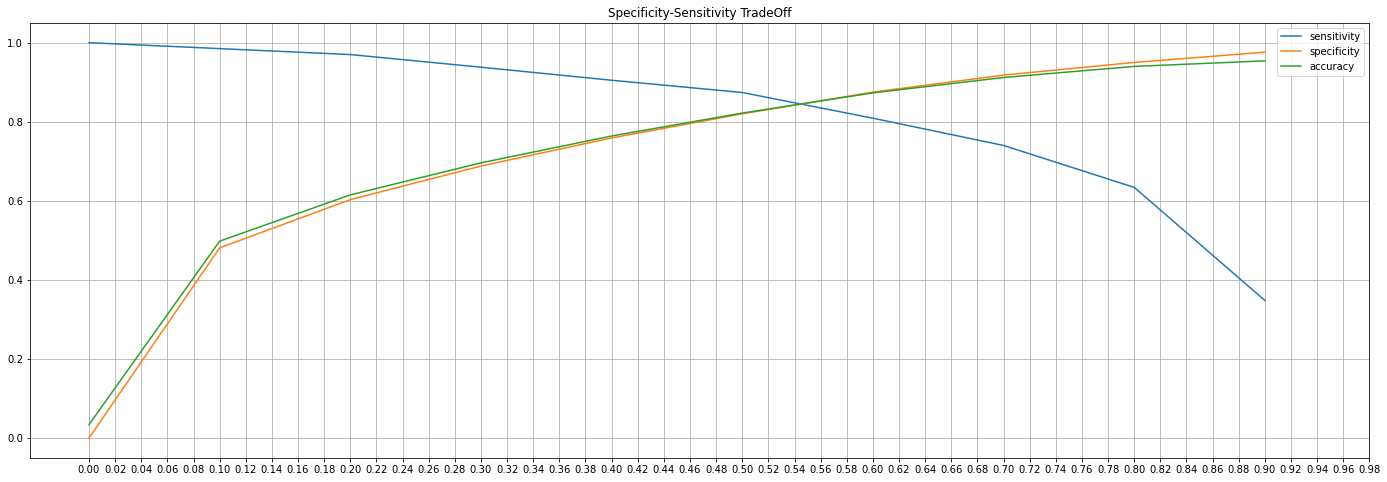

In [182]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [183]:
optimum_cutoff = 0.55
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[16057  2875]
 [  103   558]]

Confusion Matrix for test: 
 [[4367 3743]
 [  69  219]]


In [184]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.848
Sensitivity / True Positive Rate / Recall : 0.844
Specificity / True Negative Rate :  0.848
Precision / Positive Predictive Value : 0.163
F1-score : 0.273


Test Performance : 

Accuracy : 0.546
Sensitivity / True Positive Rate / Recall : 0.76
Specificity / True Negative Rate :  0.538
Precision / Positive Predictive Value : 0.055
F1-score : 0.103


In [185]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.92 

ROC AUC score for Test :  0.704


### Feature Selection using RFE

In [186]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, step=15)
results = rfe.fit(X_train,y_train)
results.support_

array([ True,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [187]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
0,circle_id,1,True
74,std_ic_t2f_mou_7,1,True
72,std_ic_t2m_mou_8,1,True
71,std_ic_t2m_mou_7,1,True
69,std_ic_t2t_mou_8,1,True
...,...,...,...
106,vol_3g_mb_6,7,False
120,Average_rech_amt_6n7,7,False
123,sachet_3g_6_2,7,False
51,og_others_8,7,False


In [188]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['circle_id',
 'std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2t_mou_7',
 'total_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_6',
 'spl_og_mou_8',
 'std_ic_t2f_mou_8',
 'spl_og_mou_7',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'max_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_6',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_6',
 'total_ic_mou_8',
 'std_ic_mou_8',
 'spl_og_mou_6',
 'std_ic_mou_7',
 'isd_og_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_7',
 'loc

### Logistic Regression with RFE selected columns

In [189]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37787
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12333.
Date:                Mon, 20 Feb 2023   Deviance:                       24666.
Time:                        23:33:16   Pearson chi2:                 7.86e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.5204
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
circle_id              0.0044      0.001      5.507      0.000       0.003       0.006
std_ic_t2f_mou_7       0.1066      0.028      3.857      0.000       0.052       0.161
std_ic_t2m_mou_8      -0.1501      0.074     -2.028      0.043      -0.295      -0.005
std_ic_t2m_mou_7      -0.4202      0.050     -8.334      0.000      -0.519      -0.321
std_ic_t2t_mou_8      -0.3221      0.051     -6.349      0.000      -0.422      -0.223
std_ic_t2t_mou_6       0.0466      0.031      1.516      0.129      -0.014       0.107
loc_ic_mou_8          -1.1380      0.217     -5.243      0.000      -1.563      -0.713
loc_ic_mou_7          -6.3302      2.530     -2.502      0.012     -11.289      -1.372
loc_ic_mou_6          -0.0533      0.154     -0.347      0.729      -0.355       0.248
loc_ic_t2f_mou_8      -0.4186      0.070     -5.938      0.000      -0.557      -0.280
loc_ic_t2f_mou_7       0.6199      0.312      1.984      0.047       0.007       1.232
loc_ic_t2f_mou_6      -0.0302      0.044     -0.683      0.495      -0.117       0.056
loc_ic_t2m_mou_7       4.2516      1.701      2.499      0.012       0.917       7.586
loc_ic_t2m_mou_6       0.4391      0.097      4.513      0.000       0.248       0.630
loc_ic_t2t_mou_8       0.0624      0.075      0.836      0.403      -0.084       0.209
loc_ic_t2t_mou_7       2.4937      0.922      2.705      0.007       0.687       4.301
total_og_mou_8        -1.2410      0.493     -2.518      0.012      -2.207      -0.275
total_og_mou_7         2.8082      0.278     10.091      0.000       2.263       3.354
total_og_mou_6        -0.5816      0.102     -5.701      0.000      -0.782      -0.382
spl_og_mou_8          -0.0137      0.026     -0.534      0.593      -0.064       0.036
std_ic_t2f_mou_8      -0.2109      0.034     -6.141      0.000      -0.278      -0.144
spl_og_mou_7          -0.0463      0.021     -2.180      0.029      -0.088      -0.005
std_ic_mou_6           0.3223      0.061      5.243      0.000       0.202       0.443
total_ic_mou_6        -0.5080      0.133     -3.829      0.000      -0.768      -0.248
sep_vbc_3g            -0.2898      0.032     -9.085      0.000      -0.352      -0.227
aug_vbc_3g            -0.3311      0.030    -11.014      0.000      -0.390      -0.272
vol_2g_mb_8           -0.2157      0.023     -9.292      0.000      -0.261      -0.170
vol_2g_mb_6           -0.1644      0.021     -7.971      0.000      -0.205      -0.124
last_day_rch_amt_8    -0.0057      0.000    -20.571      0.000      -0.006      -0.005
last_day_rch_amt_7    -0.0034      0.000    -12.015      0.000      -0.004      -0.003
last_day_rch_amt_6    -0.0014      0.000     -4.858      0.000      -0.002      -0.001
max_rech_amt_6        -0.0003      0.000     -1.317      0.188      -0.001       0.000
total_rech_amt_7       0.2524      0.0

 ### Logistic Regression with Manual Feature Elimination

In [190]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ['P-value'], ascending = [False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
arpu_8,8.27,0.8511
loc_og_mou_8,127.38,0.8438
total_ic_mou_8,45.40,0.7359
std_ic_mou_8,30.30,0.7350
loc_ic_mou_6,41.93,0.7289
...,...,...
ic_others_8,1.24,0.0000
spl_og_mou_6,1.36,0.0000
std_ic_mou_7,10.05,0.0000


In [191]:
selected_columns = rfe_selected_columns
selected_columns.remove('std_ic_mou_8')
selected_columns.remove('loc_ic_mou_6')
selected_columns.remove('spl_og_mou_8')
selected_columns.remove('total_ic_mou_8')
selected_columns

['circle_id',
 'std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2t_mou_7',
 'total_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_6',
 'std_ic_t2f_mou_8',
 'spl_og_mou_7',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'max_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_6',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_6',
 'spl_og_mou_6',
 'std_ic_mou_7',
 'isd_og_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_7',
 'roam_og_mo

### Model II

In [192]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37791
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12334.
Date:                Mon, 20 Feb 2023   Deviance:                       24668.
Time:                        23:34:40   Pearson chi2:                 7.84e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.5204
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
circle_id              0.0044      0.001      5.541      0.000       0.003       0.006
std_ic_t2f_mou_7       0.1075      0.028      3.897      0.000       0.053       0.162
std_ic_t2m_mou_8      -0.1987      0.030     -6.734      0.000      -0.257      -0.141
std_ic_t2m_mou_7      -0.4121      0.048     -8.659      0.000      -0.505      -0.319
std_ic_t2t_mou_8      -0.3502      0.029    -11.963      0.000      -0.408      -0.293
std_ic_t2t_mou_6       0.0489      0.030      1.618      0.106      -0.010       0.108
loc_ic_mou_8          -1.1983      0.108    -11.096      0.000      -1.410      -0.987
loc_ic_mou_7          -6.2764      2.545     -2.466      0.014     -11.265      -1.288
loc_ic_t2f_mou_8      -0.4200      0.070     -5.963      0.000      -0.558      -0.282
loc_ic_t2f_mou_7       0.6149      0.314      1.956      0.050      -0.001       1.231
loc_ic_t2f_mou_6      -0.0315      0.043     -0.732      0.464      -0.116       0.053
loc_ic_t2m_mou_7       4.2162      1.711      2.463      0.014       0.862       7.571
loc_ic_t2m_mou_6       0.4240      0.076      5.615      0.000       0.276       0.572
loc_ic_t2t_mou_8       0.0599      0.075      0.803      0.422      -0.086       0.206
loc_ic_t2t_mou_7       2.4699      0.927      2.665      0.008       0.653       4.286
total_og_mou_8        -1.3558      0.454     -2.984      0.003      -2.246      -0.465
total_og_mou_7         2.8162      0.278     10.148      0.000       2.272       3.360
total_og_mou_6        -0.5802      0.102     -5.714      0.000      -0.779      -0.381
std_ic_t2f_mou_8      -0.2184      0.033     -6.652      0.000      -0.283      -0.154
spl_og_mou_7          -0.0497      0.020     -2.464      0.014      -0.089      -0.010
std_ic_mou_6           0.3363      0.050      6.707      0.000       0.238       0.435
total_ic_mou_6        -0.5499      0.090     -6.106      0.000      -0.726      -0.373
sep_vbc_3g            -0.2900      0.032     -9.096      0.000      -0.352      -0.228
aug_vbc_3g            -0.3312      0.030    -11.032      0.000      -0.390      -0.272
vol_2g_mb_8           -0.2158      0.023     -9.302      0.000      -0.261      -0.170
vol_2g_mb_6           -0.1644      0.021     -7.972      0.000      -0.205      -0.124
last_day_rch_amt_8    -0.0057      0.000    -20.614      0.000      -0.006      -0.005
last_day_rch_amt_7    -0.0034      0.000    -12.044      0.000      -0.004      -0.003
last_day_rch_amt_6    -0.0014      0.000     -4.870      0.000      -0.002      -0.001
max_rech_amt_6        -0.0003      0.000     -1.301      0.193      -0.001       0.000
total_rech_amt_7       0.2534      0.045      5.669      0.000       0.166       0.341
total_rech_amt_6       0.4469      0.076      5.900      0.000       0.298       0.595
total_rech_num_8      -0.0631      0.0

In [193]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
arpu_8,8.26,0.8485
loc_og_mou_8,124.90,0.7500
loc_ic_t2f_mou_6,3.14,0.4644
loc_ic_t2t_mou_8,5.95,0.4218
isd_ic_mou_6,2.73,0.3224
...,...,...
total_rech_num_7,4.82,0.0000
ic_others_8,1.22,0.0000
spl_og_mou_6,1.33,0.0000


In [194]:
selected_columns.remove('loc_ic_t2f_mou_6')
selected_columns.remove('loc_ic_t2t_mou_8')
selected_columns.remove('total_rech_num_6')
selected_columns.remove('max_rech_amt_6')
selected_columns.remove('arpu_8')
selected_columns.remove('std_ic_t2t_mou_6')
selected_columns.remove('isd_ic_mou_6')
selected_columns

['circle_id',
 'std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'loc_ic_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_7',
 'total_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_6',
 'std_ic_t2f_mou_8',
 'spl_og_mou_7',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_6',
 'total_rech_num_8',
 'total_rech_num_7',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'spl_og_mou_6',
 'std_ic_mou_7',
 'isd_og_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_7',
 'roam_og_mou_8',
 'roam_ic_mou_8',
 'roam_ic_mou_7',
 'offnet_mou_8',
 'isd_og_mou_8',
 'onnet_mou_8',
 'onnet_mou_6',
 'arpu_6',
 

### Model III

In [195]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37798
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12338.
Date:                Mon, 20 Feb 2023   Deviance:                       24676.
Time:                        23:35:25   Pearson chi2:                 7.73e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.5203
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
circle_id              0.0037      0.001      5.390      0.000       0.002       0.005
std_ic_t2f_mou_7       0.1042      0.027      3.811      0.000       0.051       0.158
std_ic_t2m_mou_8      -0.1984      0.029     -6.742      0.000      -0.256      -0.141
std_ic_t2m_mou_7      -0.4383      0.045     -9.814      0.000      -0.526      -0.351
std_ic_t2t_mou_8      -0.3378      0.028    -11.930      0.000      -0.393      -0.282
loc_ic_mou_8          -1.1338      0.082    -13.804      0.000      -1.295      -0.973
loc_ic_mou_7          -6.4405      2.451     -2.628      0.009     -11.244      -1.637
loc_ic_t2f_mou_8      -0.4445      0.068     -6.574      0.000      -0.577      -0.312
loc_ic_t2f_mou_7       0.6235      0.301      2.068      0.039       0.033       1.214
loc_ic_t2m_mou_7       4.3074      1.649      2.612      0.009       1.075       7.540
loc_ic_t2m_mou_6       0.4479      0.073      6.146      0.000       0.305       0.591
loc_ic_t2t_mou_7       2.5577      0.891      2.871      0.004       0.811       4.304
total_og_mou_8        -1.3018      0.452     -2.878      0.004      -2.188      -0.415
total_og_mou_7         2.7936      0.276     10.134      0.000       2.253       3.334
total_og_mou_6        -0.5815      0.101     -5.773      0.000      -0.779      -0.384
std_ic_t2f_mou_8      -0.2160      0.033     -6.646      0.000      -0.280      -0.152
spl_og_mou_7          -0.0497      0.020     -2.469      0.014      -0.089      -0.010
std_ic_mou_6           0.3797      0.043      8.750      0.000       0.295       0.465
total_ic_mou_6        -0.5939      0.084     -7.040      0.000      -0.759      -0.429
sep_vbc_3g            -0.2893      0.032     -9.150      0.000      -0.351      -0.227
aug_vbc_3g            -0.3333      0.030    -11.235      0.000      -0.391      -0.275
vol_2g_mb_8           -0.2147      0.023     -9.312      0.000      -0.260      -0.169
vol_2g_mb_6           -0.1668      0.021     -8.113      0.000      -0.207      -0.127
last_day_rch_amt_8    -0.0057      0.000    -21.264      0.000      -0.006      -0.005
last_day_rch_amt_7    -0.0034      0.000    -12.267      0.000      -0.004      -0.003
last_day_rch_amt_6    -0.0015      0.000     -5.302      0.000      -0.002      -0.001
total_rech_amt_7       0.2733      0.038      7.145      0.000       0.198       0.348
total_rech_amt_6       0.3952      0.066      5.978      0.000       0.266       0.525
total_rech_num_8      -0.0634      0.004    -15.801      0.000      -0.071      -0.056
total_rech_num_7       0.0141      0.004      3.845      0.000       0.007       0.021
ic_others_8           -0.3172      0.037     -8.511      0.000      -0.390      -0.244
ic_others_6           -0.0715      0.022     -3.178      0.001      -0.116      -0.027
isd_ic_mou_8          -0.1096      0.0

In [196]:
# vif and p-values
vif3=vif(X_train_resampled, logr3_fit, selected_columns)
vif3 = vif3.sort_values(by = ['VIF'], ascending = [False])

In [197]:
vif3.loc[vif3['VIF']>=5]

,VIF,P-value
Features,,
std_og_mou_8,236.11,0.0001
total_og_mou_8,201.07,0.0040
loc_og_mou_8,124.04,0.8281
std_og_mou_7,107.31,0.0000
total_og_mou_7,105.58,0.0000
std_og_t2t_mou_8,88.54,0.0000
onnet_mou_8,78.68,0.0000
std_og_t2m_mou_8,62.01,0.0000
std_og_t2t_mou_6,59.68,0.0000


In [198]:
selected_columns.remove('std_og_mou_8')
selected_columns.remove('total_og_mou_8')
selected_columns.remove('std_og_mou_7')
selected_columns.remove('total_og_mou_7')
selected_columns.remove('std_og_t2t_mou_8')
selected_columns.remove('onnet_mou_8')
selected_columns.remove('std_og_t2m_mou_8')
selected_columns.remove('std_og_t2t_mou_6')
selected_columns.remove('offnet_mou_8')
selected_columns.remove('loc_ic_mou_7')
selected_columns.remove('loc_og_mou_6')
selected_columns.remove('total_og_mou_6')
selected_columns.remove('loc_ic_t2m_mou_7')
selected_columns.remove('loc_og_t2t_mou_8')
selected_columns.remove('circle_id')
selected_columns.remove('total_ic_mou_6')
selected_columns.remove('loc_og_t2t_mou_7')
selected_columns.remove('loc_ic_t2m_mou_6')
selected_columns.remove('loc_ic_t2t_mou_7')
selected_columns.remove('std_og_t2m_mou_7')
selected_columns.remove('roam_og_mou_8')
selected_columns.remove('std_ic_mou_7')
selected_columns.remove('loc_ic_mou_8')
selected_columns.remove('std_ic_t2m_mou_7')
selected_columns

['std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'spl_og_mou_7',
 'std_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_6',
 'total_rech_num_8',
 'total_rech_num_7',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'spl_og_mou_6',
 'isd_og_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_6',
 'roam_ic_mou_8',
 'roam_ic_mou_7',
 'isd_og_mou_8',
 'onnet_mou_6',
 'arpu_6',
 'loc_og_t2c_mou_8',
 'offnet_mou_6',
 'loc_og_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7']

### Model IV

In [199]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37821
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13232.
Date:                Mon, 20 Feb 2023   Deviance:                       26464.
Time:                        23:36:50   Pearson chi2:                 6.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4971
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6312      0.061     10.374      0.000       0.512       0.750
std_ic_t2f_mou_7       0.1515      0.026      5.889      0.000       0.101       0.202
std_ic_t2m_mou_8      -0.3195      0.025    -12.957      0.000      -0.368      -0.271
std_ic_t2t_mou_8      -0.2478      0.022    -11.282      0.000      -0.291      -0.205
loc_ic_t2f_mou_8      -0.9722      0.065    -15.029      0.000      -1.099      -0.845
loc_ic_t2f_mou_7      -0.0669      0.039     -1.716      0.086      -0.143       0.009
std_ic_t2f_mou_8      -0.1968      0.030     -6.497      0.000      -0.256      -0.137
spl_og_mou_7           0.0018      0.018      0.097      0.922      -0.034       0.037
std_ic_mou_6           0.2392      0.023     10.428      0.000       0.194       0.284
sep_vbc_3g            -0.2662      0.030     -8.894      0.000      -0.325      -0.208
aug_vbc_3g            -0.3595      0.029    -12.368      0.000      -0.417      -0.303
vol_2g_mb_8           -0.2009      0.023     -8.929      0.000      -0.245      -0.157
vol_2g_mb_6           -0.1824      0.020     -9.001      0.000      -0.222      -0.143
last_day_rch_amt_8    -0.0075      0.000    -29.168      0.000      -0.008      -0.007
last_day_rch_amt_7    -0.0030      0.000    -11.110      0.000      -0.004      -0.002
last_day_rch_amt_6    -0.0014      0.000     -5.263      0.000      -0.002      -0.001
total_rech_amt_7       0.3463      0.028     12.345      0.000       0.291       0.401
total_rech_amt_6       0.5311      0.063      8.381      0.000       0.407       0.655
total_rech_num_8      -0.0937      0.003    -28.227      0.000      -0.100      -0.087
total_rech_num_7       0.0299      0.003      8.866      0.000       0.023       0.037
ic_others_8           -0.3244      0.036     -8.966      0.000      -0.395      -0.253
ic_others_6           -0.1024      0.022     -4.718      0.000      -0.145      -0.060
isd_ic_mou_8          -0.2000      0.040     -5.061      0.000      -0.277      -0.123
isd_ic_mou_7          -0.0759      0.031     -2.412      0.016      -0.138      -0.014
spl_og_mou_6          -0.1245      0.018     -7.050      0.000      -0.159      -0.090
isd_og_mou_7           0.2149      0.027      8.087      0.000       0.163       0.267
loc_og_t2f_mou_8       0.1703      0.048      3.584      0.000       0.077       0.263
loc_og_t2f_mou_7      -0.2901      0.050     -5.843      0.000      -0.387      -0.193
loc_og_t2f_mou_6       0.2378      0.039      6.145      0.000       0.162       0.314
loc_og_t2m_mou_8      -0.3162      0.095     -3.312      0.001      -0.503      -0.129
loc_og_t2m_mou_7      -0.1256      0.046     -2.733      0.006      -0.216      -0.036
loc_og_t2m_mou_6      -0.4050      0.037    -10.979      0.000      -0.477      -0.333
roam_ic_mou_8          0.8808      0.0

In [200]:
# vif and p-values
vif4=vif(X_train_resampled, logr4_fit, selected_columns)
vif4.loc[vif4['VIF']>=5]

,VIF,P-value
Features,,
loc_og_t2m_mou_7,5.31,0.0063
loc_og_t2m_mou_8,7.14,0.0009
arpu_6,11.39,0.0000
total_rech_amt_6,10.76,0.0000
total_rech_num_8,5.15,0.0000
total_rech_num_7,5.69,0.0000


In [201]:
vif4.loc[vif4['P-value']>=0.05]

,VIF,P-value
Features,,
spl_og_mou_7,1.39,0.9223
loc_ic_t2f_mou_7,3.01,0.0861


In [202]:
selected_columns.remove('loc_og_t2m_mou_7')
selected_columns.remove('total_rech_num_7')
selected_columns.remove('total_rech_num_8')
selected_columns

['std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'spl_og_mou_7',
 'std_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_6',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'spl_og_mou_6',
 'isd_og_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_6',
 'roam_ic_mou_8',
 'roam_ic_mou_7',
 'isd_og_mou_8',
 'onnet_mou_6',
 'arpu_6',
 'loc_og_t2c_mou_8',
 'offnet_mou_6',
 'loc_og_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7']

In [203]:
selected_columns.remove('spl_og_mou_7')
selected_columns.remove('loc_og_t2f_mou_8')
selected_columns

['std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_6',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'spl_og_mou_6',
 'isd_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_6',
 'roam_ic_mou_8',
 'roam_ic_mou_7',
 'isd_og_mou_8',
 'onnet_mou_6',
 'arpu_6',
 'loc_og_t2c_mou_8',
 'offnet_mou_6',
 'loc_og_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7']

In [204]:
len(selected_columns)

37

### Model V

In [205]:
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
logr5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37826
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13760.
Date:                Mon, 20 Feb 2023   Deviance:                       27520.
Time:                        23:38:19   Pearson chi2:                 7.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4829
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1465      0.037     -3.933      0.000      -0.220      -0.073
std_ic_t2f_mou_7       0.1918      0.026      7.430      0.000       0.141       0.242
std_ic_t2m_mou_8      -0.4320      0.026    -16.647      0.000      -0.483      -0.381
std_ic_t2t_mou_8      -0.3456      0.022    -15.368      0.000      -0.390      -0.302
loc_ic_t2f_mou_8      -0.9637      0.065    -14.932      0.000      -1.090      -0.837
loc_ic_t2f_mou_7      -0.0491      0.040     -1.236      0.217      -0.127       0.029
std_ic_t2f_mou_8      -0.2093      0.030     -6.916      0.000      -0.269      -0.150
std_ic_mou_6           0.2980      0.023     12.843      0.000       0.253       0.343
sep_vbc_3g            -0.2923      0.030     -9.779      0.000      -0.351      -0.234
aug_vbc_3g            -0.3479      0.029    -11.998      0.000      -0.405      -0.291
vol_2g_mb_8           -0.2526      0.023    -11.033      0.000      -0.297      -0.208
vol_2g_mb_6           -0.1627      0.020     -8.230      0.000      -0.201      -0.124
last_day_rch_amt_8    -0.0076      0.000    -29.749      0.000      -0.008      -0.007
last_day_rch_amt_7    -0.0018      0.000     -7.072      0.000      -0.002      -0.001
last_day_rch_amt_6    -0.0003      0.000     -1.161      0.246      -0.001       0.000
total_rech_amt_7       0.2712      0.022     12.525      0.000       0.229       0.314
total_rech_amt_6       0.4753      0.064      7.459      0.000       0.350       0.600
ic_others_8           -0.3672      0.037     -9.913      0.000      -0.440      -0.295
ic_others_6           -0.0948      0.021     -4.452      0.000      -0.137      -0.053
isd_ic_mou_8          -0.2490      0.040     -6.178      0.000      -0.328      -0.170
isd_ic_mou_7          -0.0529      0.031     -1.717      0.086      -0.113       0.007
spl_og_mou_6          -0.1260      0.015     -8.141      0.000      -0.156      -0.096
isd_og_mou_7           0.2549      0.027      9.562      0.000       0.203       0.307
loc_og_t2f_mou_7      -0.2369      0.044     -5.346      0.000      -0.324      -0.150
loc_og_t2f_mou_6       0.2753      0.038      7.331      0.000       0.202       0.349
loc_og_t2m_mou_8      -0.6246      0.094     -6.651      0.000      -0.809      -0.441
loc_og_t2m_mou_6      -0.3004      0.030     -9.932      0.000      -0.360      -0.241
roam_ic_mou_8          0.8294      0.030     27.321      0.000       0.770       0.889
roam_ic_mou_7          0.2070      0.027      7.539      0.000       0.153       0.261
isd_og_mou_8          -0.3658      0.040     -9.234      0.000      -0.443      -0.288
onnet_mou_6            0.3724      0.023     15.857      0.000       0.326       0.418
arpu_6                -0.6610      0.064    -10.353      0.000      -0.786      -0.536
loc_og_t2c_mou_8      -0.0316      0.0

In [206]:
# vif and p-values
vif5=vif(X_train_resampled, logr5_fit, selected_columns)
vif5

,VIF,P-value
Features,,
last_day_rch_amt_6,2.44,0.2456
loc_ic_t2f_mou_7,2.97,0.2166
isd_ic_mou_7,2.25,0.0859
loc_og_t2c_mou_8,1.06,0.0418
roam_ic_mou_7,2.05,0.0000
isd_og_mou_7,2.08,0.0000
loc_og_t2f_mou_7,3.01,0.0000
loc_og_t2f_mou_6,2.94,0.0000
loc_og_t2m_mou_8,5.62,0.0000


In [207]:
selected_columns.remove('loc_ic_t2f_mou_7')
selected_columns.remove('arpu_6')
selected_columns.remove('total_rech_amt_6')
selected_columns.remove('last_day_rch_amt_6')
selected_columns

['std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'total_rech_amt_7',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'spl_og_mou_6',
 'isd_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_6',
 'roam_ic_mou_8',
 'roam_ic_mou_7',
 'isd_og_mou_8',
 'onnet_mou_6',
 'loc_og_t2c_mou_8',
 'offnet_mou_6',
 'loc_og_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7']

### Model VI

In [208]:
logr6 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr6_fit = logr6.fit()
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37830
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13823.
Date:                Mon, 20 Feb 2023   Deviance:                       27645.
Time:                        23:40:30   Pearson chi2:                 6.76e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4812
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1825      0.034     -5.417      0.000      -0.249      -0.116
std_ic_t2f_mou_7       0.1992      0.026      7.746      0.000       0.149       0.250
std_ic_t2m_mou_8      -0.4162      0.026    -16.251      0.000      -0.466      -0.366
std_ic_t2t_mou_8      -0.3464      0.022    -15.486      0.000      -0.390      -0.303
loc_ic_t2f_mou_8      -1.0118      0.056    -18.072      0.000      -1.122      -0.902
std_ic_t2f_mou_8      -0.2279      0.030     -7.536      0.000      -0.287      -0.169
std_ic_mou_6           0.2855      0.023     12.373      0.000       0.240       0.331
sep_vbc_3g            -0.3064      0.030    -10.221      0.000      -0.365      -0.248
aug_vbc_3g            -0.3800      0.029    -13.146      0.000      -0.437      -0.323
vol_2g_mb_8           -0.2522      0.023    -11.057      0.000      -0.297      -0.207
vol_2g_mb_6           -0.1888      0.019     -9.738      0.000      -0.227      -0.151
last_day_rch_amt_8    -0.0073      0.000    -29.865      0.000      -0.008      -0.007
last_day_rch_amt_7    -0.0018      0.000     -7.329      0.000      -0.002      -0.001
total_rech_amt_7       0.2094      0.021     10.112      0.000       0.169       0.250
ic_others_8           -0.3683      0.037     -9.973      0.000      -0.441      -0.296
ic_others_6           -0.1117      0.022     -5.145      0.000      -0.154      -0.069
isd_ic_mou_8          -0.2484      0.040     -6.216      0.000      -0.327      -0.170
isd_ic_mou_7          -0.0476      0.031     -1.559      0.119      -0.107       0.012
spl_og_mou_6          -0.1318      0.015     -8.591      0.000      -0.162      -0.102
isd_og_mou_7           0.2467      0.027      9.276      0.000       0.195       0.299
loc_og_t2f_mou_7      -0.2278      0.044     -5.214      0.000      -0.313      -0.142
loc_og_t2f_mou_6       0.2526      0.037      6.819      0.000       0.180       0.325
loc_og_t2m_mou_8      -0.6060      0.094     -6.438      0.000      -0.790      -0.421
loc_og_t2m_mou_6      -0.3395      0.030    -11.475      0.000      -0.397      -0.281
roam_ic_mou_8          0.8316      0.030     27.511      0.000       0.772       0.891
roam_ic_mou_7          0.1870      0.027      7.011      0.000       0.135       0.239
isd_og_mou_8          -0.3779      0.040     -9.513      0.000      -0.456      -0.300
onnet_mou_6            0.2825      0.018     15.832      0.000       0.247       0.317
loc_og_t2c_mou_8      -0.0284      0.015     -1.835      0.067      -0.059       0.002
offnet_mou_6           0.2494      0.018     14.000      0.000       0.215       0.284
loc_og_mou_8          -1.2978      0.094    -13.748      0.000      -1.483      -1.113
std_og_t2f_mou_6      -0.2082      0.032     -6.517      0.000      -0.271      -0.146
std_og_t2f_mou_8      -0.2897      0.0

In [209]:
# vif and p-values
vif6=vif(X_train_resampled, logr6_fit, selected_columns)
vif6

,VIF,P-value
Features,,
isd_ic_mou_7,2.25,0.1189
loc_og_t2c_mou_8,1.06,0.0666
spl_og_mou_6,1.07,0.0000
std_og_t2f_mou_8,2.05,0.0000
std_og_t2f_mou_6,1.79,0.0000
loc_og_mou_8,4.48,0.0000
offnet_mou_6,1.38,0.0000
onnet_mou_6,1.28,0.0000
isd_og_mou_8,2.04,0.0000


In [210]:
selected_columns.remove('isd_ic_mou_7')
selected_columns.remove('loc_og_t2m_mou_8')
selected_columns

['std_ic_t2f_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'vol_2g_mb_8',
 'vol_2g_mb_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'total_rech_amt_7',
 'ic_others_8',
 'ic_others_6',
 'isd_ic_mou_8',
 'spl_og_mou_6',
 'isd_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'roam_ic_mou_8',
 'roam_ic_mou_7',
 'isd_og_mou_8',
 'onnet_mou_6',
 'loc_og_t2c_mou_8',
 'offnet_mou_6',
 'loc_og_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7']

In [211]:
selected_columns.remove('loc_og_t2c_mou_8')

### Model VII

In [212]:
logr7 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr7_fit = logr7.fit()
logr7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37833
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13844.
Date:                Mon, 20 Feb 2023   Deviance:                       27688.
Time:                        23:42:06   Pearson chi2:                 8.52e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4806
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1816      0.034     -5.392      0.000      -0.248      -0.116
std_ic_t2f_mou_7       0.2064      0.026      8.022      0.000       0.156       0.257
std_ic_t2m_mou_8      -0.4228      0.026    -16.547      0.000      -0.473      -0.373
std_ic_t2t_mou_8      -0.3526      0.022    -15.734      0.000      -0.397      -0.309
loc_ic_t2f_mou_8      -1.0211      0.056    -18.225      0.000      -1.131      -0.911
std_ic_t2f_mou_8      -0.2303      0.030     -7.620      0.000      -0.290      -0.171
std_ic_mou_6           0.2919      0.023     12.677      0.000       0.247       0.337
sep_vbc_3g            -0.3099      0.030    -10.306      0.000      -0.369      -0.251
aug_vbc_3g            -0.3779      0.029    -13.092      0.000      -0.435      -0.321
vol_2g_mb_8           -0.2543      0.023    -11.165      0.000      -0.299      -0.210
vol_2g_mb_6           -0.1869      0.019     -9.645      0.000      -0.225      -0.149
last_day_rch_amt_8    -0.0073      0.000    -30.077      0.000      -0.008      -0.007
last_day_rch_amt_7    -0.0018      0.000     -7.320      0.000      -0.002      -0.001
total_rech_amt_7       0.2013      0.021      9.779      0.000       0.161       0.242
ic_others_8           -0.3691      0.037    -10.011      0.000      -0.441      -0.297
ic_others_6           -0.1102      0.022     -5.105      0.000      -0.152      -0.068
isd_ic_mou_8          -0.2898      0.033     -8.767      0.000      -0.355      -0.225
spl_og_mou_6          -0.1350      0.015     -8.936      0.000      -0.165      -0.105
isd_og_mou_7           0.2423      0.026      9.217      0.000       0.191       0.294
loc_og_t2f_mou_7      -0.2257      0.044     -5.178      0.000      -0.311      -0.140
loc_og_t2f_mou_6       0.2625      0.037      7.113      0.000       0.190       0.335
loc_og_t2m_mou_6      -0.3767      0.029    -13.053      0.000      -0.433      -0.320
roam_ic_mou_8          0.8363      0.030     27.767      0.000       0.777       0.895
roam_ic_mou_7          0.1934      0.027      7.254      0.000       0.141       0.246
isd_og_mou_8          -0.3777      0.040     -9.444      0.000      -0.456      -0.299
onnet_mou_6            0.2938      0.018     16.531      0.000       0.259       0.329
offnet_mou_6           0.2528      0.018     14.219      0.000       0.218       0.288
loc_og_mou_8          -1.8562      0.051    -36.427      0.000      -1.956      -1.756
std_og_t2f_mou_6      -0.2107      0.032     -6.589      0.000      -0.273      -0.148
std_og_t2f_mou_8      -0.2914      0.044     -6.584      0.000      -0.378      -0.205
std_og_t2f_mou_7       0.2227      0.029      7.706      0.000       0.166       0.279
======================================================================================
"""

In [213]:
# vif and p-values
vif7=vif(X_train_resampled, logr7_fit, selected_columns)
vif7

,VIF,P-value
Features,,
std_ic_t2f_mou_7,1.65,0.0
std_ic_t2m_mou_8,1.45,0.0
std_og_t2f_mou_8,2.05,0.0
std_og_t2f_mou_6,1.79,0.0
loc_og_mou_8,2.04,0.0
offnet_mou_6,1.37,0.0
onnet_mou_6,1.21,0.0
isd_og_mou_8,2.03,0.0
roam_ic_mou_7,1.97,0.0


In [214]:
len(selected_columns)

30

## Final Logistic Regression Model with RFE and Manual Elimination

In [215]:
X_train_resampled_1=(X_train_resampled[selected_columns])

In [216]:
X_train_resampled_1.shape

(37864, 30)

In [217]:
X_train_resampled_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37864 entries, 0 to 37863
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   std_ic_t2f_mou_7    37864 non-null  float64
 1   std_ic_t2m_mou_8    37864 non-null  float64
 2   std_ic_t2t_mou_8    37864 non-null  float64
 3   loc_ic_t2f_mou_8    37864 non-null  float64
 4   std_ic_t2f_mou_8    37864 non-null  float64
 5   std_ic_mou_6        37864 non-null  float64
 6   sep_vbc_3g          37864 non-null  float64
 7   aug_vbc_3g          37864 non-null  float64
 8   vol_2g_mb_8         37864 non-null  float64
 9   vol_2g_mb_6         37864 non-null  float64
 10  last_day_rch_amt_8  37864 non-null  float64
 11  last_day_rch_amt_7  37864 non-null  float64
 12  total_rech_amt_7    37864 non-null  float64
 13  ic_others_8         37864 non-null  float64
 14  ic_others_6         37864 non-null  float64
 15  isd_ic_mou_8        37864 non-null  float64
 16  spl_

In [218]:
# Prediction 
y_train_pred_lr = logr7_fit.predict(sm.add_constant(X_train_resampled_1))
y_train_pred_lr.head()

0    0.135582
1    0.000073
2    0.731228
3    0.184646
4    0.002115
dtype: float64

In [219]:
y_test_pred_lr = logr7_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7001900509    0.001057
7000331038    0.863786
7000755043    0.342030
7001563827    0.018307
7001689409    0.000070
dtype: float64

## Performance
### Finding Optimum Probability Cutoff

In [220]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0
3,1,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [221]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.0,0.0,0.5
0.1,0.986,0.522,0.754
0.2,0.972,0.62,0.796
0.3,0.953,0.686,0.819
0.4,0.926,0.742,0.834
0.5,0.894,0.797,0.845
0.6,0.845,0.85,0.847
0.7,0.76,0.901,0.831
0.8,0.579,0.948,0.764
0.9,0.272,0.981,0.627


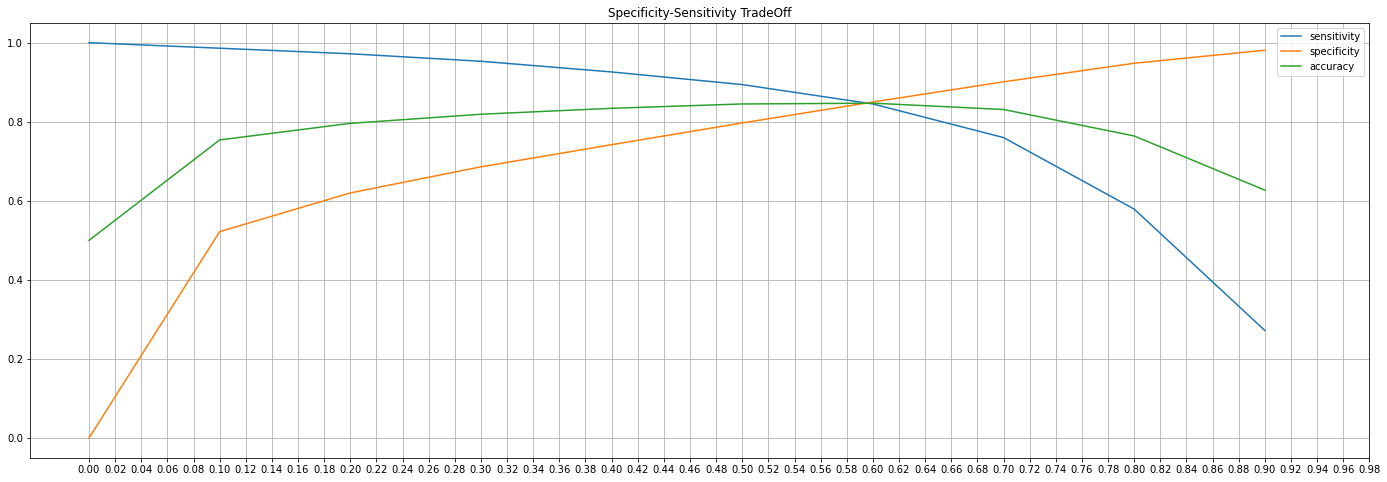

In [222]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [228]:
optimum_cutoff = 0.59
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15992  2940]
 [ 2801 16131]]

Confusion Matrix for test: 
 [[6851 1259]
 [  56  232]]


In [229]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.848
Sensitivity / True Positive Rate / Recall : 0.852
Specificity / True Negative Rate :  0.845
Precision / Positive Predictive Value : 0.846
F1-score : 0.849


Test Performance : 

Accuracy : 0.843
Sensitivity / True Positive Rate / Recall : 0.806
Specificity / True Negative Rate :  0.845
Precision / Positive Predictive Value : 0.156
F1-score : 0.261


In [230]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.919 

ROC AUC score for Test :  0.896


## Model 1 : Logistic Regression (Interpretable Model Summary)

In [231]:
lr_summary_html = logr7_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



loc_og_mou_8         -1.8562
loc_ic_t2f_mou_8     -1.0211
roam_ic_mou_8         0.8363
std_ic_t2m_mou_8     -0.4228
aug_vbc_3g           -0.3779
isd_og_mou_8         -0.3777
loc_og_t2m_mou_6     -0.3767
ic_others_8          -0.3691
std_ic_t2t_mou_8     -0.3526
sep_vbc_3g           -0.3099
onnet_mou_6           0.2938
std_ic_mou_6          0.2919
std_og_t2f_mou_8     -0.2914
isd_ic_mou_8         -0.2898
loc_og_t2f_mou_6      0.2625
vol_2g_mb_8          -0.2543
offnet_mou_6          0.2528
isd_og_mou_7          0.2423
std_ic_t2f_mou_8     -0.2303
loc_og_t2f_mou_7     -0.2257
std_og_t2f_mou_7      0.2227
std_og_t2f_mou_6     -0.2107
std_ic_t2f_mou_7      0.2064
total_rech_amt_7      0.2013
roam_ic_mou_7         0.1934
vol_2g_mb_6          -0.1869
const                -0.1816
spl_og_mou_6         -0.1350
ic_others_6          -0.1102
last_day_rch_amt_8   -0.0073
last_day_rch_amt_7   -0.0018
Name: coef, dtype: float64

## PCA

In [159]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[-1.86711304e-19,  9.32219702e-02,  1.18939944e-01, ...,
        -5.91642417e-06, -0.00000000e+00, -0.00000000e+00],
       [ 2.10787924e-20,  1.44971075e-01,  1.54661163e-01, ...,
         1.00506686e-05, -0.00000000e+00, -0.00000000e+00],
       [-1.10054686e-18,  2.40014359e-02,  4.05976184e-02, ...,
         1.36268114e-05, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-0.00000000e+00,  1.06688123e-16, -7.58738090e-17, ...,
         1.22184922e-15, -0.00000000e+00, -0.00000000e+00],
       [ 1.00000000e+00,  2.88436056e-19,  6.46477809e-19, ...,
         4.09090716e-16, -0.00000000e+00, -0.00000000e+00]])

In [160]:
pca.explained_variance_ratio_

array([2.80218220e-01, 1.52611413e-01, 1.25418285e-01, 8.49639615e-02,
       7.03070921e-02, 5.88988871e-02, 3.15007210e-02, 2.74469479e-02,
       2.64699933e-02, 1.73157409e-02, 1.22655585e-02, 1.13447171e-02,
       1.08670230e-02, 1.02704021e-02, 9.58190742e-03, 7.71506727e-03,
       5.77673446e-03, 5.57883887e-03, 4.88819056e-03, 4.80526786e-03,
       4.22805017e-03, 3.51048234e-03, 3.25993394e-03, 2.49559152e-03,
       2.33140208e-03, 2.11644178e-03, 2.04569153e-03, 2.01327894e-03,
       1.76754362e-03, 1.73711519e-03, 1.41803645e-03, 1.31238088e-03,
       1.27245105e-03, 9.66597990e-04, 8.99391496e-04, 7.15201200e-04,
       6.84215438e-04, 6.74057090e-04, 6.35286092e-04, 6.03763189e-04,
       5.83629275e-04, 5.55366180e-04, 4.51272775e-04, 4.29985345e-04,
       4.13186110e-04, 3.81990525e-04, 3.67636288e-04, 3.53204474e-04,
       3.44373507e-04, 3.35528222e-04, 2.83891742e-04, 2.64106252e-04,
       2.08717205e-04, 1.73296560e-04, 1.39635673e-04, 1.34842808e-04,
      

### Scree Plot

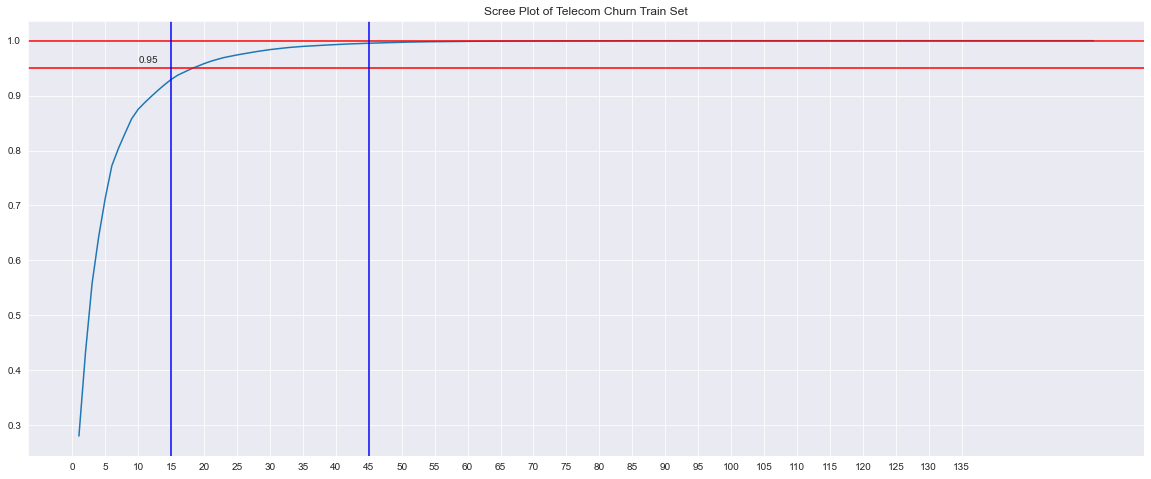

In [161]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 18 principal components and 100% of variance is explained by the first 48 principal components.

In [162]:
# Perform PCA using the first 48 components
pca_final = PCA(n_components=48, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,49)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001278716,-515.179525,31.675564,-1359.130038,950.202533,-1190.424902,288.405020,94.837427,-197.273495,344.613643,19.782391,...,3.596922,15.777747,21.681285,-24.144827,-10.380895,6.590141,-24.851211,-30.254449,4.069950,0
7001368471,637.439786,2945.981647,-1295.529071,-378.565534,102.229656,310.767974,-534.400921,2922.577148,-1299.853636,179.620326,...,-116.719101,158.370476,-106.905551,-17.119922,-153.070441,2.660623,-151.279846,10.220116,7.389781,0
7000727220,995.086141,-1190.665205,437.921425,-763.471936,-1350.099869,-256.975874,133.087272,-342.978052,98.793013,-33.633436,...,43.220821,32.375535,-8.583056,-10.263302,61.885250,-5.731787,35.009557,-9.529470,15.276352,0
7000967652,1579.175972,-444.409762,347.022973,-1187.123727,-1016.468065,-53.022464,-362.681770,-35.109237,24.671732,123.683451,...,-63.018778,17.958430,-42.466384,-8.519651,-25.759978,16.211344,6.224033,2.702689,-27.839679,0
7002032943,-1233.886854,653.658469,-875.207905,563.088672,-434.001252,111.350936,146.639553,-137.870075,1.790939,72.850482,...,-66.158435,-4.342568,85.971293,-189.471088,-39.938457,-23.727650,-18.862274,0.760209,-3.689011,0


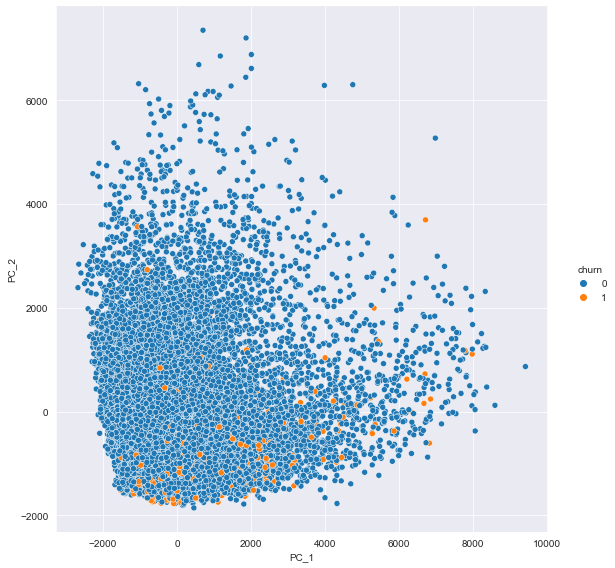

In [164]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn", size=8);

## Model 2 : PCA + Logistic Regression Model

In [165]:
# X,y Split
y_train_pca = data_train_pca.pop('churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [166]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([0, 0, 1, 1, 0])

In [167]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 1, 1, 1, 0])

#### Baseline Performance

In [168]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.747
Sensitivity / True Positive Rate / Recall : 0.893
Specificity / True Negative Rate :  0.742
Precision / Positive Predictive Value : 0.108
F1-score : 0.193

Test Performance :

Accuracy : 0.361
Sensitivity / True Positive Rate / Recall : 0.844
Specificity / True Negative Rate :  0.344
Precision / Positive Predictive Value : 0.044
F1-score : 0.084


#### Hyperparameter Tuning

In [169]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [170]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [171]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8786963191875892
Best Parameters : {'C': 5, 'penalty': 'l2'}


In [172]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 0, 1, 1, 0])

In [173]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([0, 1, 1, 1, 0])

In [174]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.728
Sensitivity / True Positive Rate / Recall : 0.899
Specificity / True Negative Rate :  0.723
Precision / Positive Predictive Value : 0.102
F1-score : 0.183

Test Performance :

Accuracy : 0.334
Sensitivity / True Positive Rate / Recall : 0.847
Specificity / True Negative Rate :  0.316
Precision / Positive Predictive Value : 0.042
F1-score : 0.08


## Model 3 : PCA + Random Forest

In [176]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.035


In [177]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.0339037547783216,
                                     1: 0.9660962452216784},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [178]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.0339037547783216,
                                                            1: 0.9660962452216784},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [179]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8930309563938098
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 30, 'n_estimators': 100}


In [180]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0])

In [181]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0])

In [182]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.918
Sensitivity / True Positive Rate / Recall : 0.865
Specificity / True Negative Rate :  0.92
Precision / Positive Predictive Value : 0.274
F1-score : 0.416

Test Performance :

Accuracy : 0.966
Sensitivity / True Positive Rate / Recall : 0.0
Specificity / True Negative Rate :  1.0
Precision / Positive Predictive Value : nan
F1-score : nan


In [183]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.9047619047619048

# Model 4 : PCA + XGBoost

In [185]:
! pip install xgboost
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [186]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


1.0

In [187]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.579375385326757

In [188]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [189]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.9011047088687039
Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 50, 'n_estimators': 150}


In [190]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [191]:
X_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001278716,-515.179525,31.675564,-1359.130038,950.202533,-1190.424902,288.405020,94.837427,-197.273495,344.613643,19.782391,...,33.188722,3.596922,15.777747,21.681285,-24.144827,-10.380895,6.590141,-24.851211,-30.254449,4.069950
7001368471,637.439786,2945.981647,-1295.529071,-378.565534,102.229656,310.767974,-534.400921,2922.577148,-1299.853636,179.620326,...,-255.168813,-116.719101,158.370476,-106.905551,-17.119922,-153.070441,2.660623,-151.279846,10.220116,7.389781
7000727220,995.086141,-1190.665205,437.921425,-763.471936,-1350.099869,-256.975874,133.087272,-342.978052,98.793013,-33.633436,...,2.450832,43.220821,32.375535,-8.583056,-10.263302,61.885250,-5.731787,35.009557,-9.529470,15.276352
7000967652,1579.175972,-444.409762,347.022973,-1187.123727,-1016.468065,-53.022464,-362.681770,-35.109237,24.671732,123.683451,...,24.820872,-63.018778,17.958430,-42.466384,-8.519651,-25.759978,16.211344,6.224033,2.702689,-27.839679
7002032943,-1233.886854,653.658469,-875.207905,563.088672,-434.001252,111.350936,146.639553,-137.870075,1.790939,72.850482,...,15.157835,-66.158435,-4.342568,85.971293,-189.471088,-39.938457,-23.727650,-18.862274,0.760209,-3.689011


In [192]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([0, 1, 0, 0, 0])

In [193]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.932
Sensitivity / True Positive Rate / Recall : 0.995
Specificity / True Negative Rate :  0.93
Precision / Positive Predictive Value : 0.331
F1-score : 0.497

Test Performance :

Accuracy : 0.887
Sensitivity / True Positive Rate / Recall : 0.233
Specificity / True Negative Rate :  0.91
Precision / Positive Predictive Value : 0.084
F1-score : 0.123


In [194]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9873419496738546
Test AUC Score
0.6764603884093712


# Recommendation

In [227]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most Important Predictors of churn , in the order of importance are : 


loc_og_mou_8         -1.3054
loc_ic_t2f_mou_8     -0.9637
roam_ic_mou_8         0.8294
arpu_6               -0.6610
loc_og_t2m_mou_8     -0.6246
total_rech_amt_6      0.4753
std_ic_t2m_mou_8     -0.4320
onnet_mou_6           0.3724
ic_others_8          -0.3672
isd_og_mou_8         -0.3658
aug_vbc_3g           -0.3479
std_ic_t2t_mou_8     -0.3456
offnet_mou_6          0.3389
loc_og_t2m_mou_6     -0.3004
std_ic_mou_6          0.2980
std_og_t2f_mou_8     -0.2958
sep_vbc_3g           -0.2923
loc_og_t2f_mou_6      0.2753
total_rech_amt_7      0.2712
isd_og_mou_7          0.2549
vol_2g_mb_8          -0.2526
isd_ic_mou_8         -0.2490
loc_og_t2f_mou_7     -0.2369
std_og_t2f_mou_7      0.2245
std_ic_t2f_mou_8     -0.2093
roam_ic_mou_7         0.2070
std_og_t2f_mou_6     -0.1990
std_ic_t2f_mou_7      0.1918
vol_2g_mb_6          -0.1627
const                -0.1465
spl_og_mou_6         -0.1260
ic_others_6          -0.0948
isd_ic_mou_7         -0.0529
loc_ic_t2f_mou_7     -0.0491
loc_og_t2c_mou

From the above, the following are the strongest indicators of churn

- Customers who churn show higher average monthly local outgoing calls in the action period by 1.31 standard deviations , compared to users who don't churn , when all other factors are held constant. This is the strongest indicator of churn.
- Customers who churn show higher roaming incoming calls  in action period by 0.96 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn.
- Further customers who churn have done 0.83 standard deviations higher roaming incoming calls than non-churn customers. This factor when coupled with above factors is a good indicator of churn.
- Customers who churn are more likely to have average revenue lesser by 0.66 points in action period , when all other factors are held constant.
- Customer who churn show lesser outgoing calls to mobile by 0.66 standard deviations compared to action phase, when all other factors are kept constant.
- There are multiple other factors which are affecting the churn factor , but above listed ones are the top 5

Based on the above indicators the recommendations to the telecom company are :

- Concentrate on users with 1.31 std devations lower than average local outgoing calls. They are most likely to churn.
- Concentrate on users who have lesser roaming incoming calls  in the 8th month by 0.96 standard deviations compared to action phase. They are second most likely to churn.This may show the rual customers as indicated in the earlier business problem explanation
- Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has a test sensitivity of 84.7% highest among all 4 models with logistics regression also having test sensitivity of 80.6%